In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file
df = pd.read_csv('crisJan24Feb25.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831092 entries, 0 to 1831091
Data columns (total 89 columns):
 #   Column                                        Dtype 
---  ------                                        ----- 
 0   Crash ID                                      int64 
 1   At Intersection Flag                          bool  
 2   City                                          object
 3   Construction Zone Flag                        object
 4   Contributing Factors                          object
 5   County                                        object
 6   Crash Date                                    object
 7   Crash Month                                   int64 
 8   Crash Number                                  int64 
 9   Crash Severity                                object
 10  Crash Time                                    int64 
 11  Crash Year                                    int64 
 12  Day of Week                                   object
 13  Fatal Crash 

### Data Understanding

In [3]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1831092, 89)


##### Key Attribute Analysis

In [4]:
# List of columns to keep
keep_columns = [
    'Crash ID', 'City', 'Crash Date', 'Crash Time', 'Crash Severity', 'Day of Week', 
    'Fatal Crash Flag', 'Crash Month', 'Latitude', 'Longitude', 'Road Class', 
    'Time Roadway Cleared', 'Weather Condition', 'Driver Alcohol Result', 'Driver Drug Test Result', 
    'Driver License Class', 'Driver License State', 'Driver License Type', 
    'Vehicle Damage Rating 1 - Area', 'Vehicle Damage Rating 1 - Direction of Force', 
    'Vehicle Damage Rating 1 - Severity', 'Vehicle Hit and Run Flag', 'Vehicle Model Name', 
    'Vehicle Model Year', 'VIN', 'Person Age', 'Person Airbag Deployed', 'Person Death Count', 
    'Person Gender', 'Intersecting Street Name', 'Intersecting Street Number', 'Region', 
    'Roadway Type', 'Lessee/Owner Zip Code', 'Citation', 'Person Blood Alcohol Content Test Result', 
    'Construction Zone Flag', 'Contributing Factors', 'First Harmful Event', 
    'Manner of Collision', 'Nearest Trauma Center Distance', 'Number of Lanes', 'Object Struck', 
    'Roadbed Width', 'Roadway Function', 'Roadway Relation', 'Speed Limit', 'Time Arrived', 
    'Time Notified', 'Unit Total Injury Count', 'Unit Suspected Serious Injury Count', 
    'At Intersection Flag', 'Rural Urban Type', 'County'
]

# Filter dataset to keep only these columns
df = df[keep_columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831092 entries, 0 to 1831091
Data columns (total 54 columns):
 #   Column                                        Dtype 
---  ------                                        ----- 
 0   Crash ID                                      int64 
 1   City                                          object
 2   Crash Date                                    object
 3   Crash Time                                    int64 
 4   Crash Severity                                object
 5   Day of Week                                   object
 6   Fatal Crash Flag                              int64 
 7   Crash Month                                   int64 
 8   Latitude                                      object
 9   Longitude                                     object
 10  Road Class                                    object
 11  Time Roadway Cleared                          int64 
 12  Weather Condition                             object
 13  Driver Alcoh

In [6]:
df.isnull().sum()

Crash ID                                             0
City                                                 0
Crash Date                                           0
Crash Time                                           0
Crash Severity                                       0
Day of Week                                          0
Fatal Crash Flag                                     0
Crash Month                                          0
Latitude                                             0
Longitude                                            0
Road Class                                           0
Time Roadway Cleared                                 0
Weather Condition                                    0
Driver Alcohol Result                                0
Driver Drug Test Result                              0
Driver License Class                                 0
Driver License State                                 0
Driver License Type                                  0
Vehicle Da

##### Resolving Inconsistencies:

In [7]:
df[['Crash Date', 'Crash Time', 'Time Roadway Cleared', 'Time Arrived', 'Time Notified']].head(10)

,Crash Date,Crash Time,Time Roadway Cleared,Time Arrived,Time Notified
0,1/1/2024,138,240,144,138
1,1/1/2024,138,240,144,138
2,1/1/2024,138,240,144,138
3,1/1/2024,138,240,144,138
4,1/1/2024,140,230,150,141
5,1/1/2024,116,128,128,116
6,1/1/2024,20,45,33,21
7,1/1/2024,20,45,33,21
8,1/1/2024,410,528,447,439
9,1/1/2024,50,149,110,50


In [8]:
# Convert integer time fields to HH:MM format (handle overflow cases)
df['Crash Time'] = pd.to_datetime(df['Crash Time'], format='%H%M', errors='coerce').dt.time
df['Time Roadway Cleared'] = pd.to_datetime(df['Time Roadway Cleared'], format='%H%M', errors='coerce').dt.time
df['Time Arrived'] = pd.to_datetime(df['Time Arrived'], format='%H%M', errors='coerce').dt.time
df['Time Notified'] = pd.to_datetime(df['Time Notified'], format='%H%M', errors='coerce').dt.time

# Confirm datatype conversion
print(df[['Crash Time', 'Time Roadway Cleared', 'Time Arrived', 'Time Notified']].dtypes)

Crash Time              object
Time Roadway Cleared    object
Time Arrived            object
Time Notified           object
dtype: object


In [9]:
df['Crash Time'].isnull().sum()

np.int64(5995)

In [10]:
df = df.loc[~df['Crash Time'].isna() & ~df['Time Arrived'].isna() & ~df['Time Notified'].isna() & ~df['Time Roadway Cleared'].isna()]

In [11]:
df.isnull().sum()

Crash ID                                             0
City                                                 0
Crash Date                                           0
Crash Time                                           0
Crash Severity                                       0
Day of Week                                          0
Fatal Crash Flag                                     0
Crash Month                                          0
Latitude                                             0
Longitude                                            0
Road Class                                           0
Time Roadway Cleared                                 0
Weather Condition                                    0
Driver Alcohol Result                                0
Driver Drug Test Result                              0
Driver License Class                                 0
Driver License State                                 0
Driver License Type                                  0
Vehicle Da

In [12]:
df[['Crash Date', 'Crash Time', 'Time Roadway Cleared', 'Time Arrived', 'Time Notified']].head(10)

,Crash Date,Crash Time,Time Roadway Cleared,Time Arrived,Time Notified
0,1/1/2024,13:08:00,02:40:00,14:04:00,13:08:00
1,1/1/2024,13:08:00,02:40:00,14:04:00,13:08:00
2,1/1/2024,13:08:00,02:40:00,14:04:00,13:08:00
3,1/1/2024,13:08:00,02:40:00,14:04:00,13:08:00
4,1/1/2024,14:00:00,23:00:00,15:00:00,14:01:00
5,1/1/2024,11:06:00,12:08:00,12:08:00,11:06:00
6,1/1/2024,02:00:00,04:05:00,03:03:00,02:01:00
7,1/1/2024,02:00:00,04:05:00,03:03:00,02:01:00
8,1/1/2024,04:10:00,05:28:00,04:47:00,04:39:00
9,1/1/2024,05:00:00,14:09:00,11:00:00,05:00:00


In [13]:
print(df[['Crash Time', 'Time Roadway Cleared', 'Time Arrived', 'Time Notified']].dtypes)

Crash Time              object
Time Roadway Cleared    object
Time Arrived            object
Time Notified           object
dtype: object


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816414 entries, 0 to 1831090
Data columns (total 54 columns):
 #   Column                                        Dtype 
---  ------                                        ----- 
 0   Crash ID                                      int64 
 1   City                                          object
 2   Crash Date                                    object
 3   Crash Time                                    object
 4   Crash Severity                                object
 5   Day of Week                                   object
 6   Fatal Crash Flag                              int64 
 7   Crash Month                                   int64 
 8   Latitude                                      object
 9   Longitude                                     object
 10  Road Class                                    object
 11  Time Roadway Cleared                          object
 12  Weather Condition                             object
 13  Driver Alcohol Re

In [15]:
# Convert Latitude and Longitude to numeric (handle invalid values)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816414 entries, 0 to 1831090
Data columns (total 54 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Crash ID                                      int64  
 1   City                                          object 
 2   Crash Date                                    object 
 3   Crash Time                                    object 
 4   Crash Severity                                object 
 5   Day of Week                                   object 
 6   Fatal Crash Flag                              int64  
 7   Crash Month                                   int64  
 8   Latitude                                      float64
 9   Longitude                                     float64
 10  Road Class                                    object 
 11  Time Roadway Cleared                          object 
 12  Weather Condition                             object 
 13  Dr

In [16]:
df['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 1205708
C - POSSIBLE INJURY              273746
B - SUSPECTED MINOR INJURY       242107
A - SUSPECTED SERIOUS INJURY      44802
99 - UNKNOWN                      39345
K - FATAL INJURY                  10703
95 - AUTONOMOUS                       3
Name: count, dtype: int64

In [17]:
df['Crash Severity'] = df['Crash Severity'].replace('95 - AUTONOMOUS', '99 - UNKNOWN')
df['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 1205708
C - POSSIBLE INJURY              273746
B - SUSPECTED MINOR INJURY       242107
A - SUSPECTED SERIOUS INJURY      44802
99 - UNKNOWN                      39348
K - FATAL INJURY                  10703
Name: count, dtype: int64

In [18]:
df['Day of Week'].value_counts()

Day of Week
FRIDAY       307548
THURSDAY     273900
WEDNESDAY    268486
TUESDAY      266033
MONDAY       252440
SATURDAY     247364
SUNDAY       200643
Name: count, dtype: int64

In [19]:
df['Fatal Crash Flag'].value_counts()

Fatal Crash Flag
0    1805711
1      10703
Name: count, dtype: int64

In [20]:
df['Crash Month'].value_counts()

Crash Month
1     235634
2     228586
10    147241
5     141589
12    138289
8     136973
11    136896
3     135197
4     134670
9     134450
6     124167
7     122722
Name: count, dtype: int64

In [21]:
df['Road Class'].value_counts()

Road Class
CITY STREET            668124
US & STATE HIGHWAYS    420741
INTERSTATE             317833
FARM TO MARKET         156986
COUNTY ROAD            114904
NON TRAFFICWAY         109417
TOLLWAY                 27466
OTHER ROADS               923
TOLL BRIDGES               20
Name: count, dtype: int64

In [22]:
df['Road Class'] = df['Road Class'].replace('TOLL BRIDGES', 'OTHER ROADS')
df['Road Class'].value_counts()

Road Class
CITY STREET            668124
US & STATE HIGHWAYS    420741
INTERSTATE             317833
FARM TO MARKET         156986
COUNTY ROAD            114904
NON TRAFFICWAY         109417
TOLLWAY                 27466
OTHER ROADS               943
Name: count, dtype: int64

In [23]:
df['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            1434884
2 - CLOUDY                            224502
3 - RAIN                              133355
6 - FOG                                 7883
99 - UNKNOWN                            6655
5 - SNOW                                3665
4 - SLEET/HAIL                          3187
98 - OTHER (EXPLAIN IN NARRATIVE)       1117
7 - BLOWING SAND/SNOW                    591
8 - SEVERE CROSSWINDS                    575
Name: count, dtype: int64

In [24]:
df['Weather Condition'] = df['Weather Condition'].replace({
    '1 - CLEAR': 'Clear',
    '2 - CLOUDY': 'Cloudy',
    '3 - RAIN': 'Rain',
    '6 - FOG': 'Adverse Weather',
    '5 - SNOW': 'Adverse Weather',
    '4 - SLEET/HAIL': 'Adverse Weather',
    '7 - BLOWING SAND/SNOW': 'Adverse Weather',
    '8 - SEVERE CROSSWINDS': 'Adverse Weather',
    '98 - OTHER (EXPLAIN IN NARRATIVE)': 'Other',
    '99 - UNKNOWN': 'Other'
})
df['Weather Condition'].value_counts()

Weather Condition
Clear              1434884
Cloudy              224502
Rain                133355
Adverse Weather      15901
Other                 7772
Name: count, dtype: int64

In [25]:
df['Driver Alcohol Result'].value_counts()

Driver Alcohol Result
No Data         1799789
1 - POSITIVE      12989
2 - NEGATIVE       3636
Name: count, dtype: int64

In [26]:
df['Driver Drug Test Result'].value_counts()

Driver Drug Test Result
97 - NOT APPLICABLE    1783047
No Data                  24600
99 - UNKNOWN              6224
2 - NEGATIVE              1443
1 - POSITIVE              1100
Name: count, dtype: int64

In [27]:
df['Driver Alcohol Result'] = df['Driver Alcohol Result'].replace('No Data', '97 - NOT APPLICABLE')
df['Driver Alcohol Result'].value_counts()

Driver Alcohol Result
97 - NOT APPLICABLE    1799789
1 - POSITIVE             12989
2 - NEGATIVE              3636
Name: count, dtype: int64

In [28]:
df['Driver Drug Test Result'] = df['Driver Drug Test Result'].replace({
    'No Data': '97 - NOT APPLICABLE',
    '99 - UNKNOWN': '97 - NOT APPLICABLE'
})
df['Driver Drug Test Result'].value_counts()

Driver Drug Test Result
97 - NOT APPLICABLE    1813871
2 - NEGATIVE              1443
1 - POSITIVE              1100
Name: count, dtype: int64

In [29]:
df['Driver License Class'].value_counts()

Driver License Class
C - CLASS C                1191770
5 - UNLICENSED              217352
99 - UNKNOWN                116491
98 - OTHER/OUT OF STATE     114188
A - CLASS A                  59466
B - CLASS B                  39735
CM - CLASS C AND M           34112
No Data                      29888
AM - CLASS A AND M            8310
BM - CLASS B AND M            4854
M - CLASS M                    216
95 - AUTONOMOUS                 32
Name: count, dtype: int64

In [30]:
df['Driver License Class'] = df['Driver License Class'].replace({
    '95 - AUTONOMOUS': '99 - UNKNOWN',
    'No Data': '99 - UNKNOWN'
})
df['Driver License Class'].value_counts()

Driver License Class
C - CLASS C                1191770
5 - UNLICENSED              217352
99 - UNKNOWN                146411
98 - OTHER/OUT OF STATE     114188
A - CLASS A                  59466
B - CLASS B                  39735
CM - CLASS C AND M           34112
AM - CLASS A AND M            8310
BM - CLASS B AND M            4854
M - CLASS M                    216
Name: count, dtype: int64

In [31]:
df['Driver License State'].value_counts()

Driver License State
TX - TEXAS                       1408059
No Data                           178024
UN - UNKNOWN                      115844
MX - MEXICO                        14854
LA - LOUISIANA                      9247
                                  ...   
GU - GUAM                             31
VI - U.S. VIRGIN ISLANDS              30
SO - SONORA                           17
MP - NORTHERN MARIANA ISLANDS          4
WK - WAKE ISLAND                       2
Name: count, Length: 63, dtype: int64

In [32]:
df['Driver License State'] = df['Driver License State'].replace({
    'No Data': 'UN - UNKNOWN'
})
df['Driver License State'].value_counts()

Driver License State
TX - TEXAS                       1408059
UN - UNKNOWN                      293868
MX - MEXICO                        14854
LA - LOUISIANA                      9247
FL - FLORIDA                        8824
                                  ...   
GU - GUAM                             31
VI - U.S. VIRGIN ISLANDS              30
SO - SONORA                           17
MP - NORTHERN MARIANA ISLANDS          4
WK - WAKE ISLAND                       2
Name: count, Length: 62, dtype: int64

In [33]:
df['Driver License Type'].value_counts()

Driver License Type
1 - DRIVER LICENSE            1368501
5 - UNLICENSED                 148104
99 - UNKNOWN                   115844
2 - COMMERCIAL DRIVER LIC.      80937
4 - ID CARD                     68404
No Data                         29888
98 - OTHER                       4350
3 - OCCUPATIONAL                  354
95 - AUTONOMOUS                    32
Name: count, dtype: int64

In [34]:
df['Driver License Type'] = df['Driver License Type'].replace({
    '95 - AUTONOMOUS': '99 - UNKNOWN',
    'No Data': '99 - UNKNOWN'
})
df['Driver License Type'].value_counts()

Driver License Type
1 - DRIVER LICENSE            1368501
5 - UNLICENSED                 148104
99 - UNKNOWN                   145764
2 - COMMERCIAL DRIVER LIC.      80937
4 - ID CARD                     68404
98 - OTHER                       4350
3 - OCCUPATIONAL                  354
Name: count, dtype: int64

In [35]:
df['Vehicle Damage Rating 1 - Area'].value_counts()

Vehicle Damage Rating 1 - Area
FD - FRONT END DAMAGE DISTRIBUTED IMPACT              354838
BD - BACK END DAMAGE DISTRIBUTED IMPACT               187743
FR - FRONT END (RIGHT)  DAMAGE PARTIAL CONTACT        157280
FL - FRONT END (LEFT) DAMAGE PARTIAL CONTACT          153373
No Data                                               106877
LFQ - LEFT FRONT QUARTER DAMAGE ANGULAR IMPACT        101929
RFQ - RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT        98266
FC - FRONT END DAMAGE CONCENTRATED IMPACT              92296
LP - LEFT SIDE DAMAGE ANGULAR IMPACT                   68505
RP - RIGHT SIDE DAMAGE ANGULAR IMPACT                  68466
LBQ - LEFT BACK QUARTER DAMAGE ANGULAR IMPACT          65514
RBQ - RIGHT BACK QUARTER DAMAGE ANGULAR IMPACT         60091
BL - BACK END (LEFT) DAMAGE PARTIAL CONTACT            57532
BC - BACK END DAMAGE CONCENTRATED IMPACT               55707
LD - DISTRIBUTED LEFT SIDE DAMAGE PARALLEL IMPACT      53497
RD - DISTRIBUTED RIGHT SIDE DAMAGE PARALLEL IMPACT    

In [36]:
df['Vehicle Damage Rating 1 - Area'] = df['Vehicle Damage Rating 1 - Area'].replace({
    'FD - FRONT END DAMAGE DISTRIBUTED IMPACT': 'Front Impact',
    'FR - FRONT END (RIGHT)  DAMAGE PARTIAL CONTACT': 'Front Impact',
    'FL - FRONT END (LEFT) DAMAGE PARTIAL CONTACT': 'Front Impact',
    'FC - FRONT END DAMAGE CONCENTRATED IMPACT': 'Front Impact',
    
    'BD - BACK END DAMAGE DISTRIBUTED IMPACT': 'Back Impact',
    'BL - BACK END (LEFT) DAMAGE PARTIAL CONTACT': 'Back Impact',
    'BR - BACK END (RIGHT) DAMAGE PARTIAL CONTACT': 'Back Impact',
    'BC - BACK END DAMAGE CONCENTRATED IMPACT': 'Back Impact',
    
    'LP - LEFT SIDE DAMAGE ANGULAR IMPACT': 'Side Impact',
    'RP - RIGHT SIDE DAMAGE ANGULAR IMPACT': 'Side Impact',
    'LD - DISTRIBUTED LEFT SIDE DAMAGE PARALLEL IMPACT': 'Side Impact',
    'RD - DISTRIBUTED RIGHT SIDE DAMAGE PARALLEL IMPACT': 'Side Impact',
    
    'LFQ - LEFT FRONT QUARTER DAMAGE ANGULAR IMPACT': 'Angular Impact',
    'RFQ - RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT': 'Angular Impact',
    'LBQ - LEFT BACK QUARTER DAMAGE ANGULAR IMPACT': 'Angular Impact',
    'RBQ - RIGHT BACK QUARTER DAMAGE ANGULAR IMPACT': 'Angular Impact',
    
    'R&T - RIGHT SIDE AND TOP DAMAGE ROLLOVER EFFECTS': 'Rollover/Top Impact',
    'L&T - LEFT SIDE AND TOP DAMAGE ROLLOVER EFFECTS': 'Rollover/Top Impact',
    'TP - TOP DAMAGE': 'Rollover/Top Impact',
    
    'VX - UNDERCARRIAGE DAMAGE': 'Severe Damage',
    'VB - VEHICLE BURNED': 'Severe Damage',
    
    'MC - MOTORCYCLE, SCOOTER, MOPED, ETC. ONLY': 'Motorcycle Only',
    
    'NA - NOT APPLICABLE ( FARM TRACTOR, ETC.)': 'Unknown',
    'No Data': 'Unknown'
})

In [37]:
df['Vehicle Damage Rating 1 - Area'].value_counts()

Vehicle Damage Rating 1 - Area
Front Impact           757787
Back Impact            351186
Angular Impact         325800
Side Impact            241744
Unknown                108671
Rollover/Top Impact     19966
Severe Damage            6015
Motorcycle Only          5245
Name: count, dtype: int64

In [38]:
df['Vehicle Damage Rating 1 - Direction of Force'].value_counts()

Vehicle Damage Rating 1 - Direction of Force
12 - 12 O'CLOCK    416237
No Data            328454
6 - 6 O'CLOCK      237226
11 - 11 O'CLOCK    143372
1 - 1 O'CLOCK      138306
3 - 3 O'CLOCK      112713
9 - 9 O'CLOCK      105412
2 - 2 O'CLOCK       72654
10 - 10 O'CLOCK     69188
7 - 7 O'CLOCK       60963
5 - 5 O'CLOCK       52636
8 - 8 O'CLOCK       42297
4 - 4 O'CLOCK       36956
Name: count, dtype: int64

In [39]:
df['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
2 - DAMAGED 2            506414
1 - DAMAGED 1 MINIMUM    495699
3 - DAMAGED 3            376948
4 - DAMAGED 4            168679
No Data                  108671
5 - DAMAGED 5             70681
0 - NO DAMAGE             44191
6 - DAMAGED 6             25551
7 - DAMAGED 7 HIGHEST     19580
Name: count, dtype: int64

In [40]:
df['Vehicle Damage Rating 1 - Severity'] = df['Vehicle Damage Rating 1 - Severity'].map({
    '0 - NO DAMAGE': 'No Damage',
    '1 - DAMAGED 1 MINIMUM': 'Minor Damage',
    '2 - DAMAGED 2': 'Moderate Damage',
    '3 - DAMAGED 3': 'Moderate Damage',
    '4 - DAMAGED 4': 'Severe Damage',
    '5 - DAMAGED 5': 'Severe Damage',
    '6 - DAMAGED 6': 'Critical Damage',
    '7 - DAMAGED 7 HIGHEST': 'Critical Damage',
    'No Data': 'Unknown'
})
df['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
Moderate Damage    883362
Minor Damage       495699
Severe Damage      239360
Unknown            108671
Critical Damage     45131
No Damage           44191
Name: count, dtype: int64

In [41]:
df['Vehicle Hit and Run Flag'].value_counts()

Vehicle Hit and Run Flag
No         1676906
Yes         124827
No Data      14681
Name: count, dtype: int64

In [42]:
df['Vehicle Hit and Run Flag'] = df['Vehicle Hit and Run Flag'].replace({
    'No Data': 'No'
})
df['Vehicle Hit and Run Flag'].value_counts()

Vehicle Hit and Run Flag
No     1691587
Yes     124827
Name: count, dtype: int64

In [43]:
df['Vehicle Model Name'].value_counts()

Vehicle Model Name
F150 (FORD)                            68846
No Data                                57264
SILVERADO (CHEVROLET)                  51367
CAMRY (TOYOTA)                         48171
COROLLA (TOYOTA)                       39248
                                       ...  
AT (AUTOCAR)                               1
NOT APPLICABLE (MONARCH TRAILER CO)        1
KLE300 (KAWASAKI)                          1
HIGH COE (WHITE/GMC)                       1
UNKNOWN (LIDDELL INDUSTRIES INC)           1
Name: count, Length: 3404, dtype: int64

In [44]:
df['Vehicle Model Year'].value_counts()

Vehicle Model Year
2017    115290
2019    113465
2018    112673
2015    109304
2016    107101
         ...  
1938         1
1927         1
1942         1
1932         1
1935         1
Name: count, Length: 99, dtype: int64

In [45]:
df['VIN'].value_counts()

VIN
No Data              89187
UNKNOWN               2952
UNK                    378
2.86953E+16            239
0                      176
                     ...  
1FTEW1C80AFB85063        1
5XYRL4LC8PG201869        1
JTDBF30K820005640        1
1B7HC13Y2XJ501977        1
1C6HJTAG1LL207472        1
Name: count, Length: 1189956, dtype: int64

In [46]:
df['Person Age'].value_counts()

Person Age
No Data    123090
18          46011
19          45896
20          43885
21          42900
            ...  
111             2
117             2
106             2
112             1
125             1
Name: count, Length: 120, dtype: int64

In [47]:
# Convert 'No Data' to NaN and make it numeric
df['Person Age'] = pd.to_numeric(df['Person Age'], errors='coerce')

# Drop any remaining NaNs before conversion (or fill with a default value)
df['Person Age'] = df['Person Age'].fillna(0).astype(int)

# Fill missing ages with the mean age within each Crash ID group (fast method)
df['Person Age'] = df['Person Age'].fillna(df.groupby('Crash ID')['Person Age'].transform('mean'))

df['Person Age'].value_counts()

Person Age
0      132412
18      46011
19      45896
20      43885
21      42900
        ...  
111         2
117         2
106         2
112         1
125         1
Name: count, Length: 119, dtype: int64

In [48]:
df['Person Airbag Deployed'].value_counts()

Person Airbag Deployed
1 - NOT DEPLOYED          1320162
5 - DEPLOYED, MULTIPLE     170972
99 - UNKNOWN               116463
2 - DEPLOYED, FRONT        111805
97 - NOT APPLICABLE         58281
3 - DEPLOYED, SIDE          38029
4 - DEPLOYED, REAR            702
Name: count, dtype: int64

In [49]:
df['Person Airbag Deployed'] = df['Person Airbag Deployed'].replace({
    '1 - NOT DEPLOYED': 'Not Deployed',
    '97 - NOT APPLICABLE': '99 - UNKNOWN'
})
df['Person Airbag Deployed'].value_counts()

Person Airbag Deployed
Not Deployed              1320162
99 - UNKNOWN               174744
5 - DEPLOYED, MULTIPLE     170972
2 - DEPLOYED, FRONT        111805
3 - DEPLOYED, SIDE          38029
4 - DEPLOYED, REAR            702
Name: count, dtype: int64

In [50]:
df['Person Death Count'].value_counts()

Person Death Count
0    1811837
1       4577
Name: count, dtype: int64

In [51]:
df['Person Gender'].value_counts()

Person Gender
1 - MALE           957507
2 - FEMALE         761018
99 - UNKNOWN        97870
95 - AUTONOMOUS        19
Name: count, dtype: int64

In [52]:
df['Person Gender'] = df['Person Gender'].replace({
    '95 - AUTONOMOUS': '99 - UNKNOWN'
})
df['Person Gender'].value_counts()

Person Gender
1 - MALE        957507
2 - FEMALE      761018
99 - UNKNOWN     97889
Name: count, dtype: int64

In [53]:
df['Intersecting Street Name'].value_counts()

Intersecting Street Name
NOT REPORTED    53178
UNKNOWN         33574
IH0010           3794
IH0045           3327
SL0008           3202
                ...  
DELL CT             1
MACEDONIA RD        1
CLAIRE ST           1
ROYS LN             1
FM1956              1
Name: count, Length: 44413, dtype: int64

In [54]:
df['Intersecting Street Number'].value_counts()

Intersecting Street Number
NO DATA    1816414
Name: count, dtype: int64

In [55]:
df['Region'].value_counts()

Region
PD    87161
1     32402
A     31524
F     28725
B     26663
      ...  
58        1
14        1
WN        1
MM        1
R         1
Name: count, Length: 259, dtype: int64

In [56]:
df['Roadway Type'].value_counts()

Roadway Type
No Data                       880171
4 OR MORE LANES, DIVIDED      584388
4 OR MORE LANES, UNDIVIDED    208593
2 LANE, 2 WAY                 141450
OTHER ROAD TYPE                 1812
Name: count, dtype: int64

In [57]:
df['Roadway Type'] = df['Roadway Type'].replace({
    'No Data': 'OTHER ROAD TYPE'
})
df['Roadway Type'].value_counts()

Roadway Type
OTHER ROAD TYPE               881983
4 OR MORE LANES, DIVIDED      584388
4 OR MORE LANES, UNDIVIDED    208593
2 LANE, 2 WAY                 141450
Name: count, dtype: int64

In [58]:
df['Lessee/Owner Zip Code'].value_counts()

Lessee/Owner Zip Code
No Data    77289
77449       9936
77084       7888
78046       7120
77433       6957
           ...  
2130           1
73956          1
20736          1
776502         1
762078         1
Name: count, Length: 21479, dtype: int64

In [59]:
df['Citation'].value_counts()

Citation
No Data                            1510399
NONE                                   670
SUMMONS                                498
WARNING                                279
SUMMONS, SUMMONS                       211
                                    ...   
E0269815                                 1
E0280233                                 1
148212687, 148212687, 148212687          1
E0290614                                 1
023125, 023125                           1
Name: count, Length: 299024, dtype: int64

In [60]:
df['Person Blood Alcohol Content Test Result'].value_counts()

Person Blood Alcohol Content Test Result
No Data    1802466
0             2184
0.15           184
0.17           180
0.14           156
            ...   
0.362            1
0.88             1
0.53             1
0.381            1
0.382            1
Name: count, Length: 423, dtype: int64

In [61]:
df['Construction Zone Flag'].value_counts()

Construction Zone Flag
No     1728346
Yes      88068
Name: count, dtype: int64

In [62]:
df['Contributing Factors'].value_counts()

Contributing Factors
FAILED TO CONTROL SPEED                                                                                      313784
CHANGED LANE WHEN UNSAFE                                                                                     126392
DRIVER INATTENTION                                                                                           104952
FAILED TO YIELD RIGHT OF WAY - TURNING LEFT                                                                   94188
FAILED TO YIELD RIGHT OF WAY - STOP SIGN                                                                      86706
                                                                                                              ...  
DISTRACTION IN VEHICLE; FAILED TO DRIVE IN SINGLE LANE; SPEEDING - (OVERLIMIT); UNDER INFLUENCE - ALCOHOL         1
FAILED TO PASS TO LEFT SAFELY;FATIGUED OR ASLEEP;UNSAFE SPEED                                                     1
DISTRACTION IN VEHICLE;DRIVER INATTENTION;UNSAFE SP

In [63]:
# Keep top 10 contributing factors; group others as 'Other'
top_factors = df['Contributing Factors'].value_counts().nlargest(20).index
df['Contributing Factors'] = df['Contributing Factors'].apply(lambda x: x if x in top_factors else 'OTHER')
df['Contributing Factors'].value_counts()

Contributing Factors
OTHER                                               533958
FAILED TO CONTROL SPEED                             313784
CHANGED LANE WHEN UNSAFE                            126392
DRIVER INATTENTION                                  104952
FAILED TO YIELD RIGHT OF WAY - TURNING LEFT          94188
FAILED TO YIELD RIGHT OF WAY - STOP SIGN             86706
OTHER (EXPLAIN IN NARRATIVE)                         84804
FAILED TO DRIVE IN SINGLE LANE                       59737
DISREGARD STOP AND GO SIGNAL                         53766
FAILED TO YIELD RIGHT OF WAY - PRIVATE DRIVE         53271
BACKED WITHOUT SAFETY                                46961
FOLLOWED TOO CLOSELY                                 41119
DISREGARD STOP SIGN OR LIGHT                         35184
DRIVER INATTENTION; FAILED TO CONTROL SPEED          34859
UNSAFE SPEED                                         30429
NONE                                                 27554
TURNED WHEN UNSAFE                 

In [64]:
df['First Harmful Event'].value_counts()

First Harmful Event
MOTOR VEHICLE IN TRANSPORT    1538241
FIXED OBJECT                   139473
PARKED CAR                      70300
PEDESTRIAN                      19882
OVERTURNED                      15638
ANIMAL                          11165
OTHER OBJECT                     8536
PEDALCYCLIST                     8209
OTHER NON COLLISION              4344
RR TRAIN                          626
Name: count, dtype: int64

In [65]:
# Keep top 5 harmful events; group others as 'Other'
top_events = df['First Harmful Event'].value_counts().nlargest(5).index
df['First Harmful Event'] = df['First Harmful Event'].apply(lambda x: x if x in top_events else 'Other')
df['First Harmful Event'].value_counts()

First Harmful Event
MOTOR VEHICLE IN TRANSPORT    1538241
FIXED OBJECT                   139473
PARKED CAR                      70300
Other                           32880
PEDESTRIAN                      19882
OVERTURNED                      15638
Name: count, dtype: int64

In [66]:
df['Manner of Collision'].value_counts()

Manner of Collision
SAME DIRECTION - BOTH GOING STRAIGHT-REAR END                   285715
ANGLE - BOTH GOING STRAIGHT                                     251109
SAME DIRECTION - ONE STRAIGHT-ONE STOPPED                       244800
SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE                  234133
ONE MOTOR VEHICLE - GOING STRAIGHT                              209806
OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN                 141180
ANGLE - ONE STRAIGHT-ONE LEFT TURN                              104350
ANGLE - ONE STRAIGHT-ONE RIGHT TURN                              52560
SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN                      46321
OPPOSITE DIRECTION - BOTH GOING STRAIGHT                         30716
SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN                     28577
ONE MOTOR VEHICLE - BACKING                                      24800
ONE MOTOR VEHICLE - TURNING LEFT                                 16597
ONE MOTOR VEHICLE - TURNING RIGHT                        

In [67]:
# Keep only the top-level categories before the '-' character
df['Manner of Collision'] = df['Manner of Collision'].str.split(' - ').str[0]
df['Manner of Collision'].value_counts()

Manner of Collision
SAME DIRECTION        869371
ANGLE                 441542
ONE MOTOR VEHICLE     278173
OPPOSITE DIRECTION    198553
OTHER                  28775
Name: count, dtype: int64

In [68]:
df['Nearest Trauma Center Distance'].value_counts()

Nearest Trauma Center Distance
No Data    132986
2.554         764
2.228         669
2.049         618
2.338         587
            ...  
28.04           1
31.643          1
33.345          1
26.927          1
31.12           1
Name: count, Length: 30048, dtype: int64

In [69]:
# Convert 'No Data' to NaN and make it numeric
df['Nearest Trauma Center Distance'] = pd.to_numeric(df['Nearest Trauma Center Distance'].replace('No Data', np.nan), errors='coerce')

# Fill NaNs with overall median
df.loc[:, 'Nearest Trauma Center Distance'] = df['Nearest Trauma Center Distance'].fillna(
    df['Nearest Trauma Center Distance'].median()
)

df['Nearest Trauma Center Distance'].value_counts()

Nearest Trauma Center Distance
3.337     133165
2.554        764
2.228        669
2.049        618
2.338        587
           ...  
21.496         1
25.463         1
12.810         1
22.990         1
23.788         1
Name: count, Length: 30047, dtype: int64

In [70]:
df['Number of Lanes'].value_counts()

Number of Lanes
No Data    880171
4          372686
6          206085
2          138897
8          103582
10          28380
9           24331
7           21100
5           12149
11           7437
12           6537
3            4304
14           4071
13           3615
15           1631
16            755
17            622
1              61
Name: count, dtype: int64

In [71]:
# Replace 'No Data' with NaN
df['Number of Lanes'] = df['Number of Lanes'].replace('No Data', np.nan)

# Convert to numeric
df['Number of Lanes'] = pd.to_numeric(df['Number of Lanes'], errors='coerce')

df['Number of Lanes'].value_counts()

Number of Lanes
4.0     372686
6.0     206085
2.0     138897
8.0     103582
10.0     28380
9.0      24331
7.0      21100
5.0      12149
11.0      7437
12.0      6537
3.0       4304
14.0      4071
13.0      3615
15.0      1631
16.0       755
17.0       622
1.0         61
Name: count, dtype: int64

In [72]:
df['Object Struck'].value_counts()

Object Struck
NOT APPLICABLE                                                      1568461
HIT MEDIAN BARRIER (CONCRETE OR CABLE)                                32504
OVERTURNED                                                            31161
HIT FENCE                                                             22738
HIT TREE, SHRUB, LANDSCAPING                                          16705
HIT CONCRETE TRAFFIC BARRIER (NOT IN MEDIAN)                          15845
HIT GUARDRAIL                                                         14427
HIT HIGHWAY SIGN                                                      14201
HIT OTHER FIXED OBJECT                                                12870
HIT LUMINAIRE POLE                                                     9429
HIT RETAINING WALL                                                     9254
HIT UTILITY POLE                                                       9065
HIT CURB                                                               743

In [73]:
df['Roadbed Width'].value_counts()

Roadbed Width
No Data    880171
80          69765
76          68526
112         36104
72          35411
            ...  
286            11
226            11
206            10
193             6
280             2
Name: count, Length: 195, dtype: int64

In [74]:
df['Roadway Function'].value_counts()

Roadway Function
No Data                         880171
OTHER PRINCIPAL ARTERIAL        341086
INTERSTATE                      299808
MINOR ARTERIAL                  118051
OTHER FREEWAY AND EXPRESSWAY    114659
MAJOR COLLECTOR                  58859
MINOR COLLECTOR                   3161
LOCAL                              619
Name: count, dtype: int64

In [75]:
df['Roadway Relation'].value_counts()

Roadway Relation
ON ROADWAY        1552994
OFF ROADWAY        119882
NOT APPLICABLE     109044
MEDIAN              29079
SHOULDER             5415
Name: count, dtype: int64

In [76]:
df['Speed Limit'].value_counts()

Speed Limit
 45    314013
 35    273456
 30    254261
 40    225245
 65    130313
 55    128877
 60    119483
 70     87106
 50     86052
-1      61598
 75     50558
 20     19995
 5      17629
 25     16322
 15     14987
 10     13887
 80      2474
 85       158
Name: count, dtype: int64

In [77]:
# Define default speed limits based on Texas state guidelines
speed_limits = {
    'CITY STREET': 35,
    'US & STATE HIGHWAYS': 65,
    'INTERSTATE': 70,
    'FARM TO MARKET': 60,
    'COUNTY ROAD': 55,
    'TOLLWAY': 75,
    'TOLL BRIDGES': 55,
    'NON TRAFFICWAY': 25,
    'OTHER ROADS': 40
}

# Replace -1 with speed limit based on Road Class
df.loc[:, 'Speed Limit'] = df.apply(
    lambda row: speed_limits.get(row['Road Class'], 70) if row['Speed Limit'] == -1 else row['Speed Limit'],
    axis=1
)

df['Speed Limit'].value_counts()

Speed Limit
45    314013
35    298370
30    254261
40    225304
55    137796
65    131790
60    120284
70     88374
50     86052
75     51286
25     39754
20     19995
5      17629
15     14987
10     13887
80      2474
85       158
Name: count, dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816414 entries, 0 to 1831090
Data columns (total 54 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Crash ID                                      int64  
 1   City                                          object 
 2   Crash Date                                    object 
 3   Crash Time                                    object 
 4   Crash Severity                                object 
 5   Day of Week                                   object 
 6   Fatal Crash Flag                              int64  
 7   Crash Month                                   int64  
 8   Latitude                                      float64
 9   Longitude                                     float64
 10  Road Class                                    object 
 11  Time Roadway Cleared                          object 
 12  Weather Condition                             object 
 13  Dr

##### Dervied Columns 

In [79]:
df['Crash Time'] = pd.to_datetime(df['Crash Time'], format='%H:%M:%S', errors='coerce')
df['Crash Hour'] = df['Crash Time'].dt.hour
df['Crash Hour'].value_counts()

Crash Hour
16    164606
17    156989
15    149798
18    130920
14    119788
13    111486
12    110719
7     100631
19     91570
11     90353
8      88019
10     76884
20     75528
9      68054
21     64346
6      54906
22     51070
23     31767
5      28399
3      18575
4      16897
2      10618
1       4491
Name: count, dtype: int64

In [80]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Crash Hour'].apply(get_time_of_day)
df['Time of Day'].value_counts()

Time of Day
Afternoon    656397
Morning      507246
Evening      455007
Night        197764
Name: count, dtype: int64

In [81]:
df['Is Rush Hour'] = df['Crash Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0)
df['Is Rush Hour'].value_counts()

Is Rush Hour
0    1107195
1     709219
Name: count, dtype: int64

In [82]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Crash Season'] = df['Crash Month'].apply(get_season)
df['Crash Season'].value_counts()

Crash Season
Winter    602509
Fall      418587
Spring    411456
Summer    383862
Name: count, dtype: int64

In [83]:
def get_light_condition(hour):
    if 6 <= hour < 18:
        return 'Daylight'
    elif (5 <= hour < 6) or (18 <= hour < 20):
        return 'Twilight'
    else:
        return 'Dark'

df['Light Condition'] = df['Crash Hour'].apply(get_light_condition)
df['Light Condition'].value_counts()

Light Condition
Daylight    1292233
Dark         273292
Twilight     250889
Name: count, dtype: int64

In [84]:
# Convert 'Time Roadway Cleared' and 'Time Notified' to datetime
df['Time Roadway Cleared'] = pd.to_datetime(df['Time Roadway Cleared'], format='%H:%M:%S', errors='coerce')
df['Time Notified'] = pd.to_datetime(df['Time Notified'], format='%H:%M:%S', errors='coerce')
df['Time Arrived'] = pd.to_datetime(df['Time Arrived'], format='%H:%M:%S', errors='coerce')

# Add a day to 'Time Roadway Cleared' or 'Time Arrived' if 'Time Notified' is greater
df['Time Roadway Cleared'] = df.apply(
    lambda x: x['Time Roadway Cleared'] + pd.Timedelta(days=1) if x['Time Roadway Cleared'] < x['Time Notified'] else x['Time Roadway Cleared'],
    axis=1
)

df['Time Arrived'] = df.apply(
    lambda x: x['Time Arrived'] + pd.Timedelta(days=1) if x['Time Arrived'] < x['Time Notified'] else x['Time Arrived'],
    axis=1
)

# Now calculate 'Clearance Duration (Minutes)' and 'Response Time (Minutes)'
df['Clearance Duration'] = (df['Time Roadway Cleared'] - df['Time Notified']).dt.total_seconds() / 60
df['Response Time'] = (df['Time Arrived'] - df['Time Notified']).dt.total_seconds() / 60

In [85]:
df['Clearance Duration'].value_counts()

Clearance Duration
0.0       121538
10.0       30445
5.0        30425
30.0       30371
20.0       27495
           ...  
923.0          4
566.0          4
1151.0         4
558.0          4
571.0          3
Name: count, Length: 1440, dtype: int64

In [86]:
df['Response Time'].value_counts()

Response Time
0.0       213301
5.0       137945
4.0       119473
3.0       111876
6.0       110535
           ...  
1239.0         1
1207.0         1
864.0          1
1123.0         1
774.0          1
Name: count, Length: 1129, dtype: int64

In [87]:
df['Driver Impairment'] = ((df['Driver Alcohol Result'] == '1 - POSITIVE') | 
                           (df['Driver Drug Test Result'] == '1 - POSITIVE')).astype(int)
df['Driver Impairment'].value_counts()

Driver Impairment
0    1802654
1      13760
Name: count, dtype: int64

In [88]:
df['Rural Urban Type'].value_counts()

Rural Urban Type
No Data                       880171
LARGE URBANIZED (200,000+)    577296
RURAL (<5000)                 150919
URBANIZED (50,000-199,999)    118258
SMALL URBAN (5000-49,999)      89770
Name: count, dtype: int64

In [89]:
# Replace "No Data" with "Unknown"
df['Rural Urban Type'] = df['Rural Urban Type'].replace('No Data', 'Unknown')

# Verify the changes
df['Rural Urban Type'].value_counts()

Rural Urban Type
Unknown                       880171
LARGE URBANIZED (200,000+)    577296
RURAL (<5000)                 150919
URBANIZED (50,000-199,999)    118258
SMALL URBAN (5000-49,999)      89770
Name: count, dtype: int64

In [90]:
# Simplify the Rural Urban Type into "Urban" or "Rural"
df['Urban or Rural'] = df['Rural Urban Type'].apply(lambda x: 'Urban' if 'URBAN' in x else 'Rural' if 'RURAL' in x else 'Unknown')

# Verify the simplified column
df['Urban or Rural'].value_counts()

Urban or Rural
Unknown    880171
Urban      785324
Rural      150919
Name: count, dtype: int64

In [91]:
df['Driver License Type'].value_counts()

Driver License Type
1 - DRIVER LICENSE            1368501
5 - UNLICENSED                 148104
99 - UNKNOWN                   145764
2 - COMMERCIAL DRIVER LIC.      80937
4 - ID CARD                     68404
98 - OTHER                       4350
3 - OCCUPATIONAL                  354
Name: count, dtype: int64

In [92]:
# License Complexity
df['Driver License Type Complexity'] = df['Driver License Type'].map({
    '1 - DRIVER LICENSE': 1, 
    '2 - COMMERCIAL DRIVER LIC.': 2, 
    '3 - OCCUPATIONAL': 2,
    '4 - ID CARD': 0, 
    '5 - UNLICENSED': -1,
    '99 - UNKNOWN': -1,
    '98 - OTHER': -1
})
df['Driver License Type Complexity'].value_counts()

Driver License Type Complexity
 1    1368501
-1     298218
 2      81291
 0      68404
Name: count, dtype: int64

In [93]:
df['Youth Driver'] = df['Person Age'].apply(lambda x: 1 if x < 25 else 0)
df['Youth Driver'].value_counts()

Youth Driver
0    1123938
1     692476
Name: count, dtype: int64

In [94]:
df['Elderly Driver'] = df['Person Age'].apply(lambda x: 1 if x > 65 else 0)
df['Elderly Driver'].value_counts()

Elderly Driver
0    1684042
1     132372
Name: count, dtype: int64

In [95]:
df['Repeat Offender'] = df['Citation'].apply(lambda x: 1 if ',' in str(x) else 0)
df['Repeat Offender'].value_counts()

Repeat Offender
0    1749927
1      66487
Name: count, dtype: int64

In [96]:
df['BAC Level'] = pd.to_numeric(df['Person Blood Alcohol Content Test Result'], errors='coerce')
df['BAC Level'] = df['BAC Level'].apply(lambda x: 'No Alcohol' if x == 0 
                                        else 'Legal Limit' if 0 < x <= 0.08
                                        else 'Above Legal Limit' if 0.08 < x <= 0.15
                                        else 'High BAC' if x > 0.15
                                        else 'No Alcohol')
df['BAC Level'].value_counts()

BAC Level
No Alcohol           1804650
High BAC                7104
Above Legal Limit       3817
Legal Limit              843
Name: count, dtype: int64

In [97]:
from datetime import datetime

# Convert 'Vehicle Model Year' to integer, coercing errors to NaN
df['Vehicle Model Year'] = pd.to_numeric(df['Vehicle Model Year'], errors='coerce')

# Subtract to calculate vehicle age
df['Vehicle Age'] = 2025 - df['Vehicle Model Year']

In [98]:
df['Vehicle Age'].value_counts()

Vehicle Age
8.0     115290
6.0     113465
7.0     112673
10.0    109304
9.0     107101
         ...  
87.0         1
98.0         1
83.0         1
93.0         1
90.0         1
Name: count, Length: 98, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816414 entries, 0 to 1831090
Data columns (total 69 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   Crash ID                                      int64         
 1   City                                          object        
 2   Crash Date                                    object        
 3   Crash Time                                    datetime64[ns]
 4   Crash Severity                                object        
 5   Day of Week                                   object        
 6   Fatal Crash Flag                              int64         
 7   Crash Month                                   int64         
 8   Latitude                                      float64       
 9   Longitude                                     float64       
 10  Road Class                                    object        
 11  Time Roadway Cleared         

In [100]:
print(df.isnull().sum())  # Check for null values

Crash ID               0
City                   0
Crash Date             0
Crash Time             0
Crash Severity         0
                   ...  
Youth Driver           0
Elderly Driver         0
Repeat Offender        0
BAC Level              0
Vehicle Age        89777
Length: 69, dtype: int64


In [101]:
print(df.duplicated().sum())  # Check for duplicates

38078


In [102]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [103]:
print(df.isnull().sum()[df.isnull().sum() > 0])  # Shows columns with null counts greater than 0

Latitude                    129011
Longitude                   129011
Vehicle Model Year           88981
VIN                             46
Intersecting Street Name    950790
Region                      933541
Lessee/Owner Zip Code        53829
Citation                       624
Number of Lanes             857519
Vehicle Age                  88981
dtype: int64


In [104]:
df.loc[df['Vehicle Age'].isna(), 'Vehicle Age'] = df['Vehicle Age'].median()
print(df.isnull().sum()[df.isnull().sum() > 0]) 

Latitude                    129011
Longitude                   129011
Vehicle Model Year           88981
VIN                             46
Intersecting Street Name    950790
Region                      933541
Lessee/Owner Zip Code        53829
Citation                       624
Number of Lanes             857519
dtype: int64


In [105]:
df['County'].value_counts()

County
HARRIS     374606
BEXAR      161135
DALLAS     144916
TARRANT     91657
HIDALGO     64797
            ...  
KING           21
IRION          20
BRISCOE        19
KENT           17
FOARD          10
Name: count, Length: 254, dtype: int64

In [106]:
df['Latitude'] = df.groupby('County')['Latitude'].transform(lambda x: x.fillna(x.median()))
df['Longitude'] = df.groupby('County')['Longitude'].transform(lambda x: x.fillna(x.median()))
print(df.isnull().sum()[df.isnull().sum() > 0]) 

Vehicle Model Year           88981
VIN                             46
Intersecting Street Name    950790
Region                      933541
Lessee/Owner Zip Code        53829
Citation                       624
Number of Lanes             857519
dtype: int64


In [107]:
df_final = df.drop(columns=[
    'Vehicle Model Year', 
    'VIN', 
    'Intersecting Street Name', 
    'Region', 
    'Lessee/Owner Zip Code', 
    'Citation', 
    'Number of Lanes'
])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778336 entries, 0 to 1831090
Data columns (total 62 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   Crash ID                                      int64         
 1   City                                          object        
 2   Crash Date                                    object        
 3   Crash Time                                    datetime64[ns]
 4   Crash Severity                                object        
 5   Day of Week                                   object        
 6   Fatal Crash Flag                              int64         
 7   Crash Month                                   int64         
 8   Latitude                                      float64       
 9   Longitude                                     float64       
 10  Road Class                                    object        
 11  Time Roadway Cleared         

In [108]:
df_final.isnull().sum()

Crash ID           0
City               0
Crash Date         0
Crash Time         0
Crash Severity     0
                  ..
Youth Driver       0
Elderly Driver     0
Repeat Offender    0
BAC Level          0
Vehicle Age        0
Length: 62, dtype: int64

##### Exploratory Data Analysis

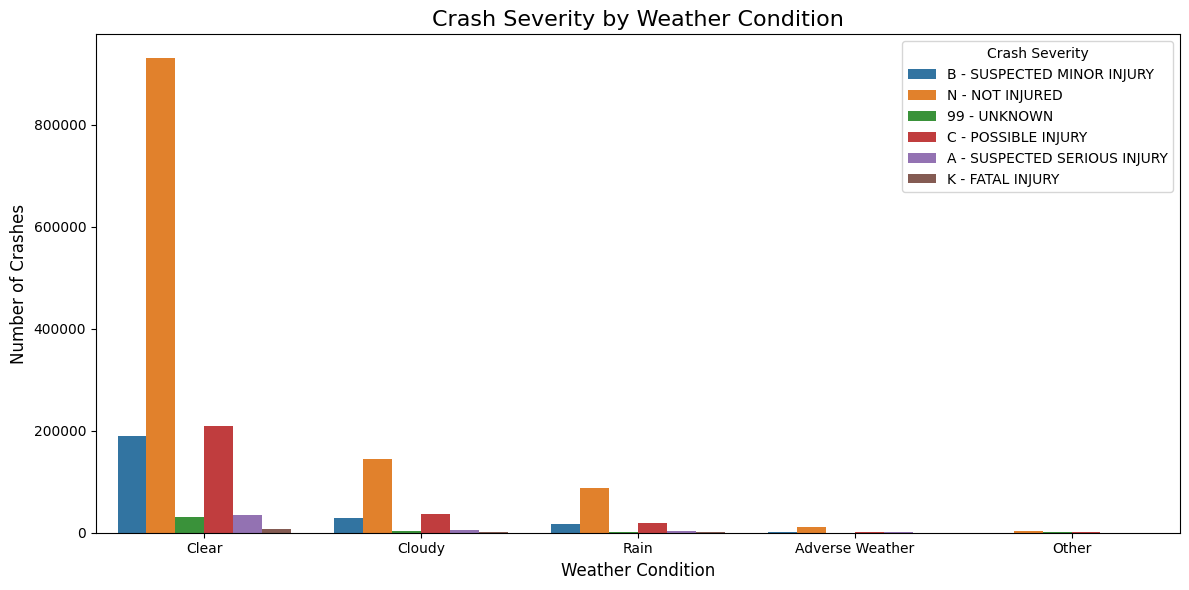

In [109]:
# Crash Severity by Weather Condition

plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='Weather Condition', hue='Crash Severity', order=df_final['Weather Condition'].value_counts().index)
plt.title('Crash Severity by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.tight_layout()
plt.show()

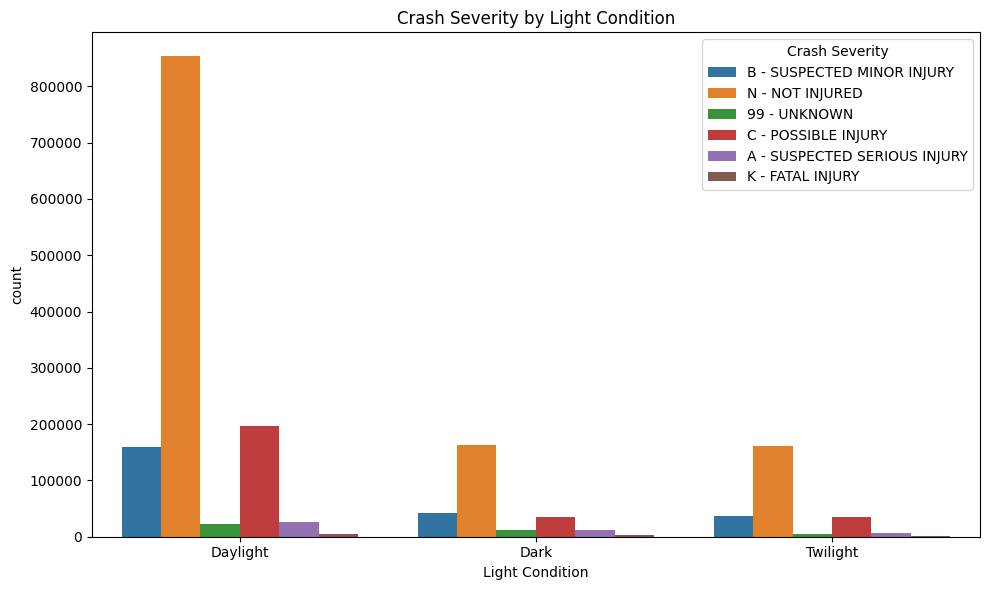

In [110]:
# Crash Severity by Light Condition

plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Light Condition', hue='Crash Severity', order=df_final['Light Condition'].value_counts().index)
plt.title('Crash Severity by Light Condition')
plt.tight_layout()
plt.show()

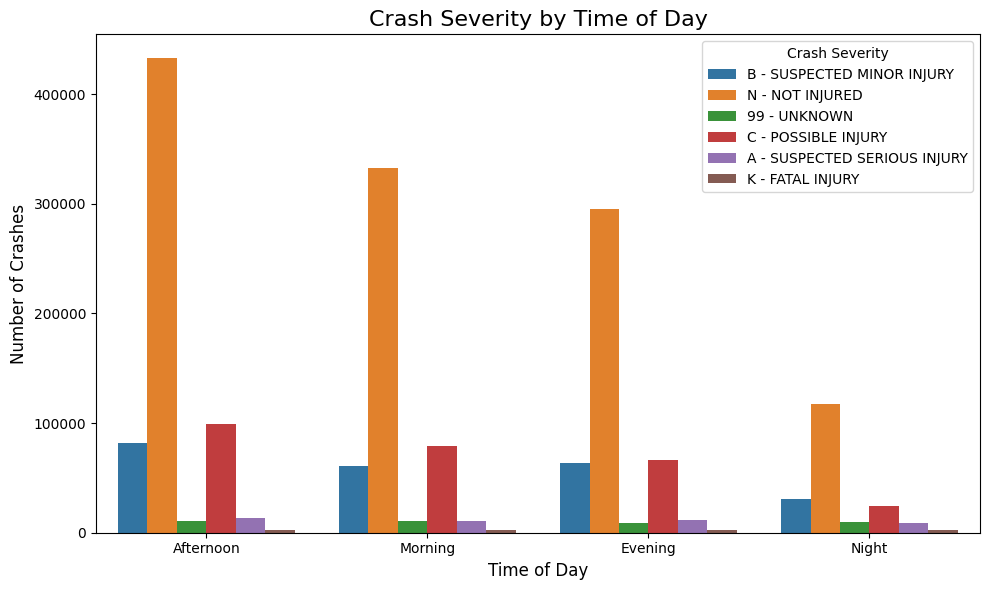

In [111]:
# Crash Severity by Time of Day

plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Time of Day', hue='Crash Severity', order=df_final['Time of Day'].value_counts().index)
plt.title('Crash Severity by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.legend(title='Crash Severity')
plt.tight_layout()
plt.show()

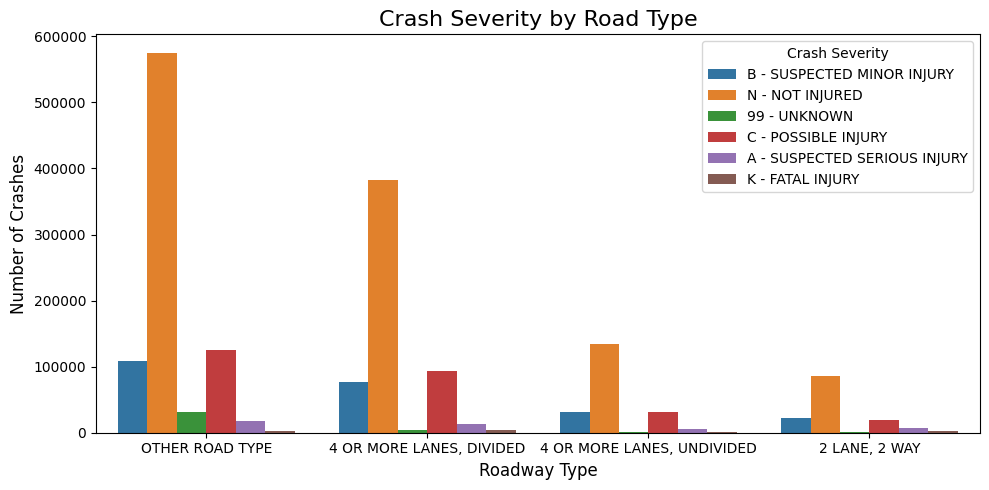

In [112]:
# Crash Severity by Road Type

plt.figure(figsize=(10, 5))
sns.countplot(data=df_final, x='Roadway Type', hue='Crash Severity', order=df_final['Roadway Type'].value_counts().index)
plt.title('Crash Severity by Road Type', fontsize=16)
plt.xlabel('Roadway Type', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.legend(title='Crash Severity')
plt.tight_layout()
plt.show()

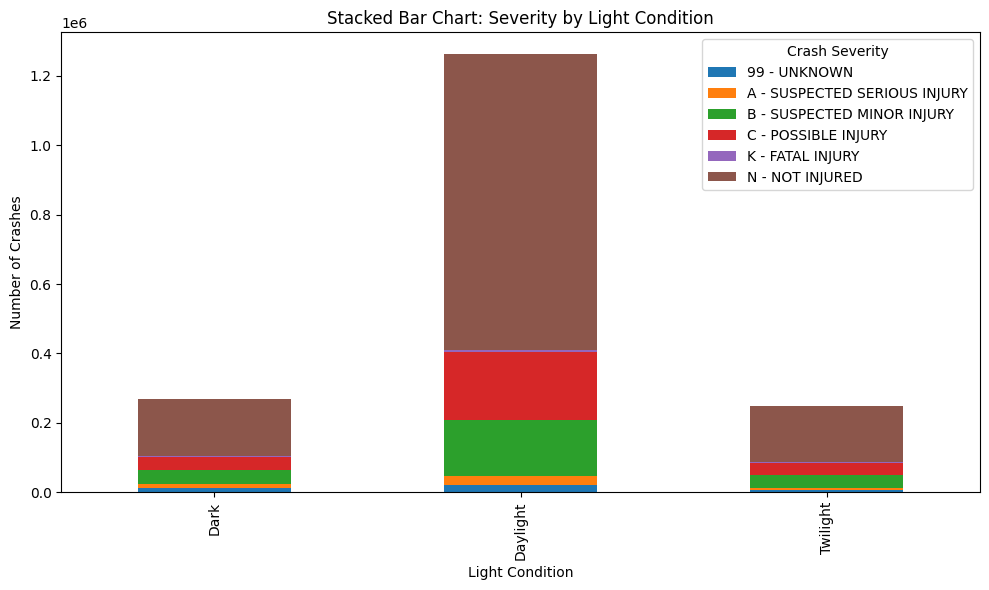

In [113]:
# Stacked Bar Charts – Severity Distribution Across Light Conditions and Time of Day

pivot = df_final.pivot_table(index='Light Condition', columns='Crash Severity', aggfunc='size', fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart: Severity by Light Condition')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()

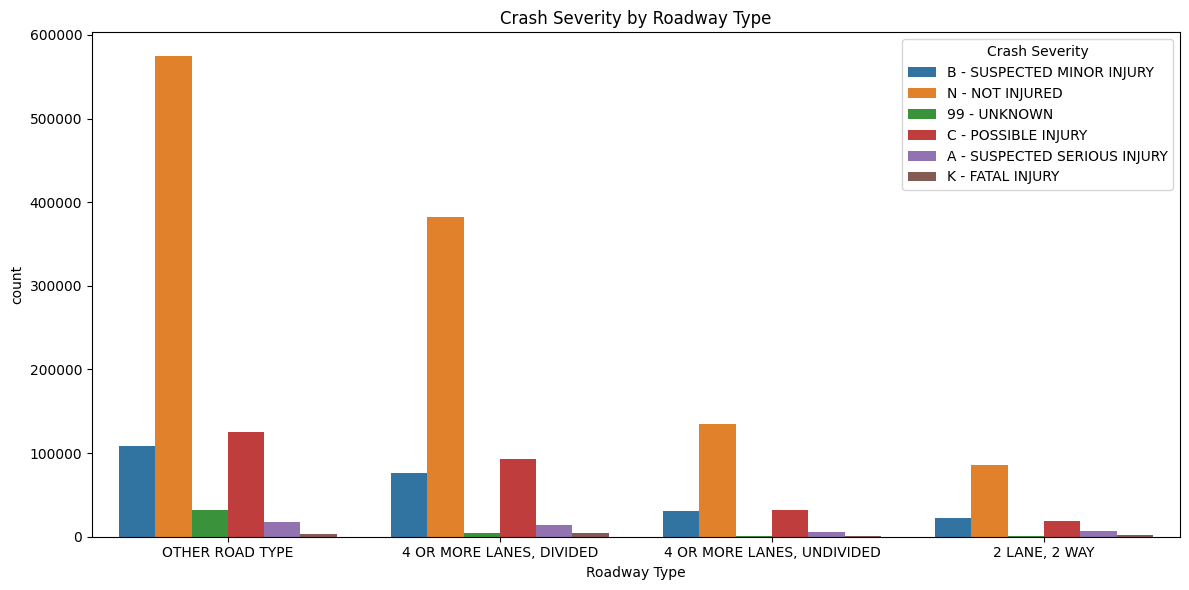

In [114]:
# Count Plots – Number of Crashes by Road Type

plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='Roadway Type', hue='Crash Severity', order=df_final['Roadway Type'].value_counts().index)
plt.title('Crash Severity by Roadway Type')
plt.tight_layout()
plt.show()

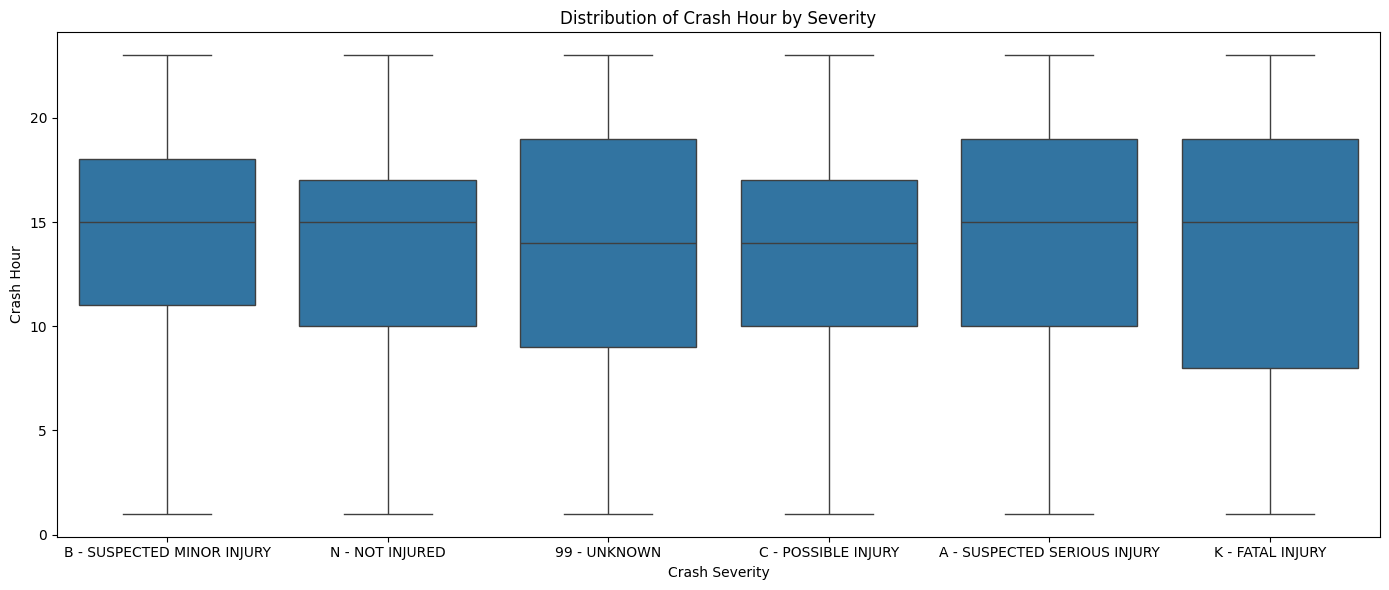

In [115]:
# Box Plots – Distribution of Severity by Crash Hour

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_final, x='Crash Severity', y='Crash Hour')
plt.title('Distribution of Crash Hour by Severity')
plt.tight_layout()
plt.show()

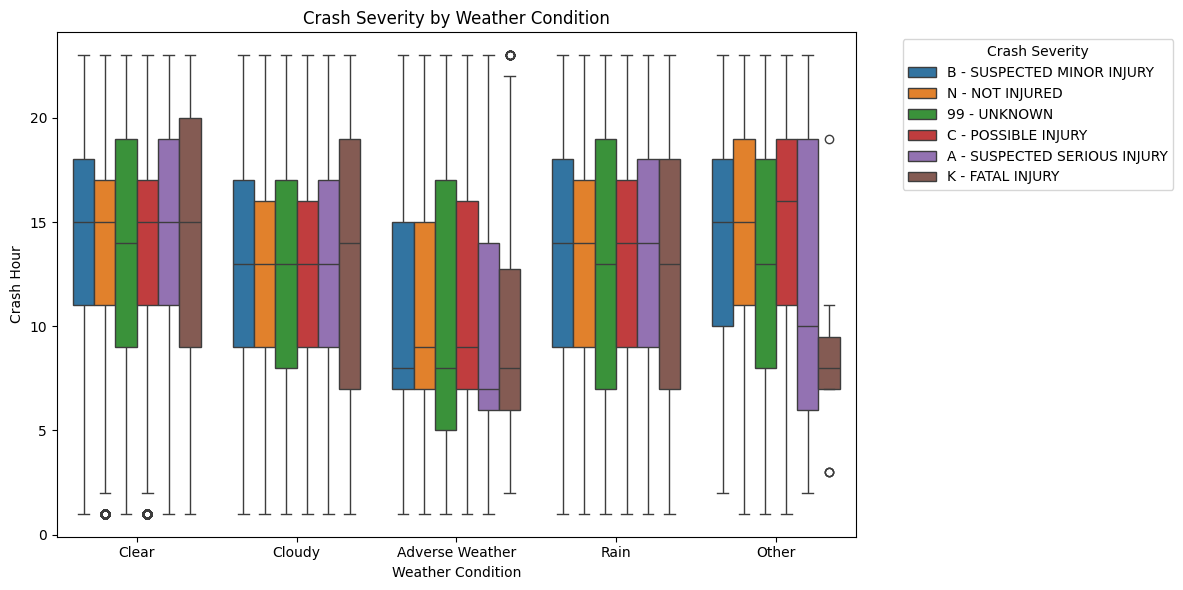

In [116]:
# Box Plots – Severity by Weather Condition

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x='Weather Condition', y='Crash Hour', hue='Crash Severity')
plt.title('Crash Severity by Weather Condition')
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

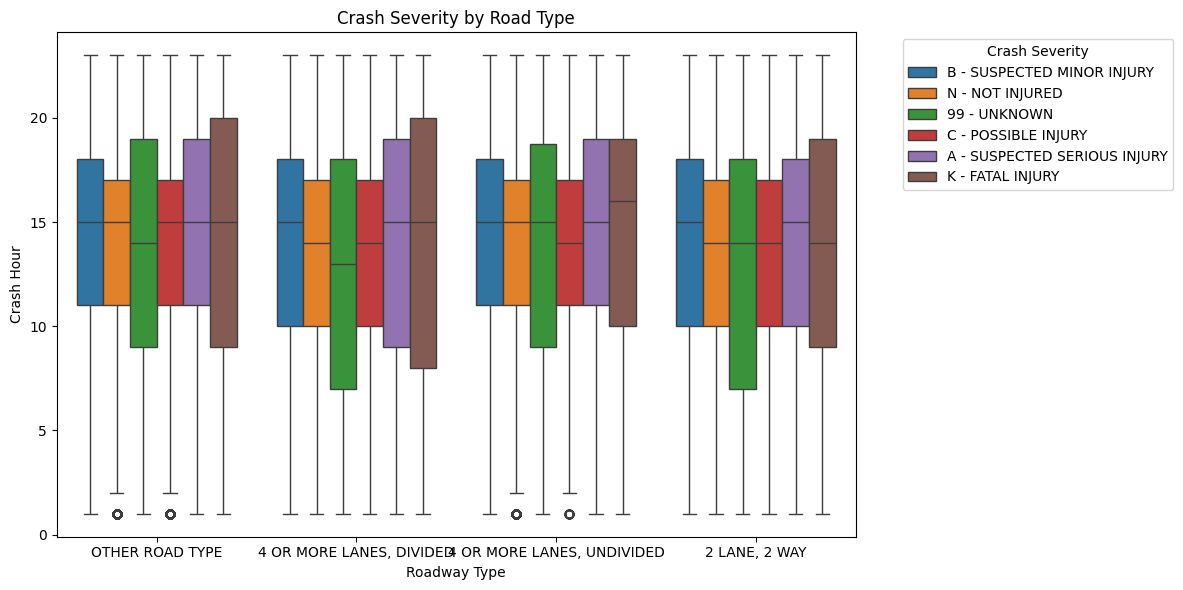

In [117]:
# Box Plots – Severity by Road Type

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x='Roadway Type', y='Crash Hour', hue='Crash Severity')
plt.title('Crash Severity by Road Type')
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

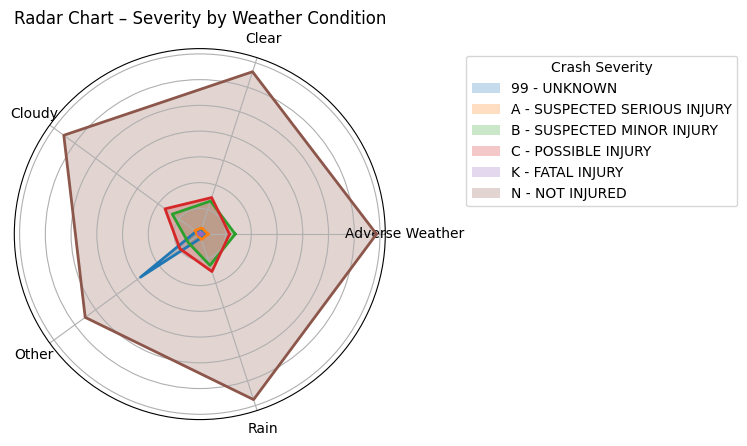

In [118]:
# Radar Chart – Compare severity by weather condition (with labels)

severity_counts = df_final.groupby('Weather Condition')['Crash Severity'].value_counts().unstack().fillna(0)
severity_counts = severity_counts.div(severity_counts.sum(axis=1), axis=0)
categories = list(severity_counts.index)
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for severity in severity_counts.columns:
    values = severity_counts[severity].tolist()
    values += values[:1]  # Close the loop
    ax.fill(angles, values, alpha=0.25, label=severity)
    ax.plot(angles, values, linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Radar Chart – Severity by Weather Condition')
plt.legend(title="Crash Severity", loc='upper left', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

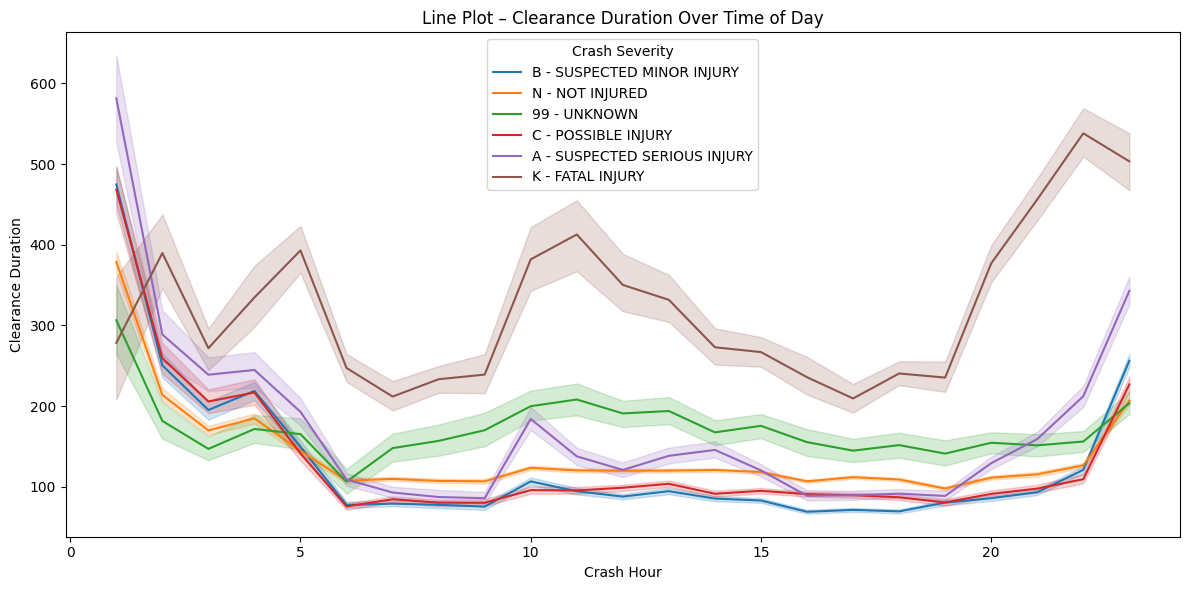

In [119]:
#Line Plot – Clearance Duration Over Time of Day

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_final, x='Crash Hour', y='Clearance Duration', hue='Crash Severity')
plt.title('Line Plot – Clearance Duration Over Time of Day')
plt.legend(title='Crash Severity')
plt.tight_layout()
plt.show()

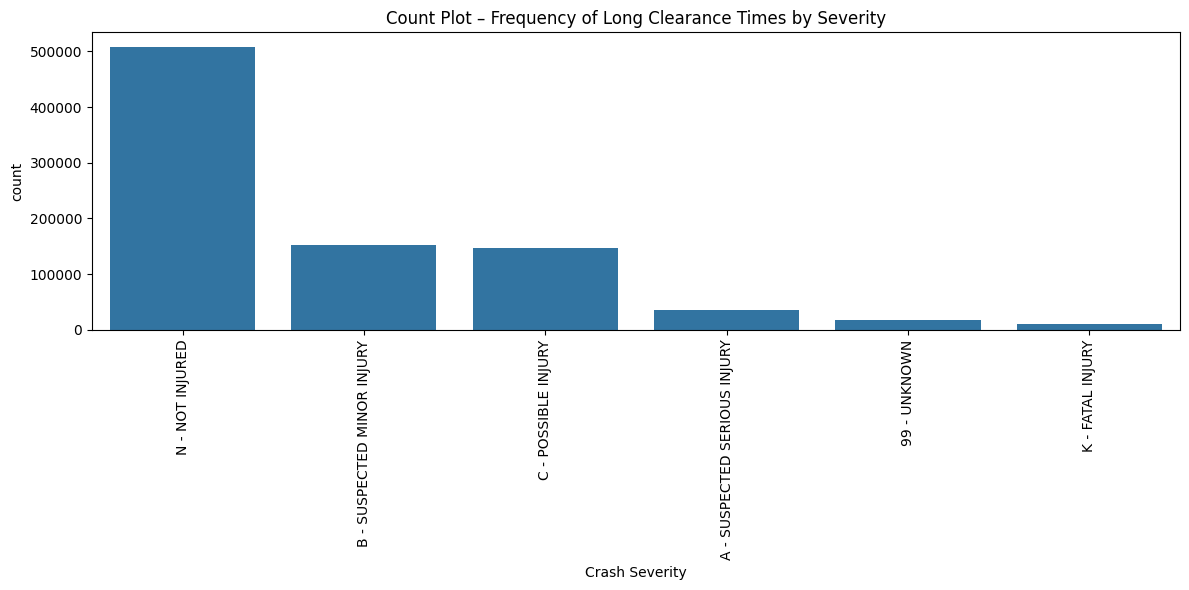

In [120]:
# Count Plot – Frequency of Long Clearance Times by Severity

long_clearance = df_final[df_final['Clearance Duration'] > df_final['Clearance Duration'].median()]
plt.figure(figsize=(12, 6))
sns.countplot(data=long_clearance, x='Crash Severity', order=long_clearance['Crash Severity'].value_counts().index)
plt.title('Count Plot – Frequency of Long Clearance Times by Severity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

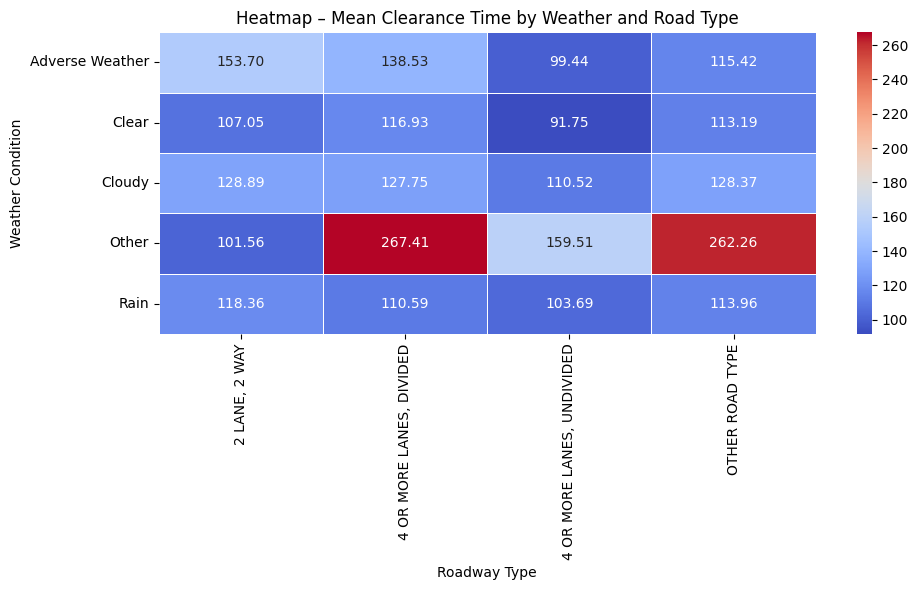

In [121]:
# Heatmap – Mean Clearance Time by Weather and Road Type

pivot = df_final.pivot_table(index='Weather Condition', columns='Roadway Type', 
                             values='Clearance Duration', aggfunc='mean').fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap – Mean Clearance Time by Weather and Road Type')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

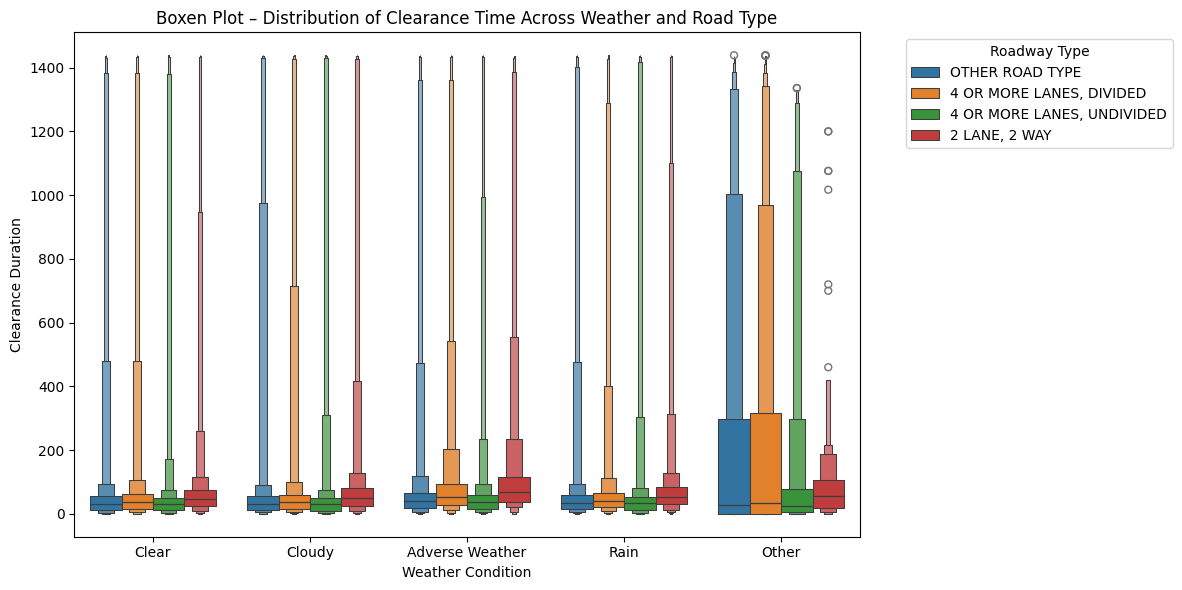

In [122]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_final, x='Weather Condition', y='Clearance Duration', hue='Roadway Type')
plt.title('Boxen Plot – Distribution of Clearance Time Across Weather and Road Type')
plt.legend(title='Roadway Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

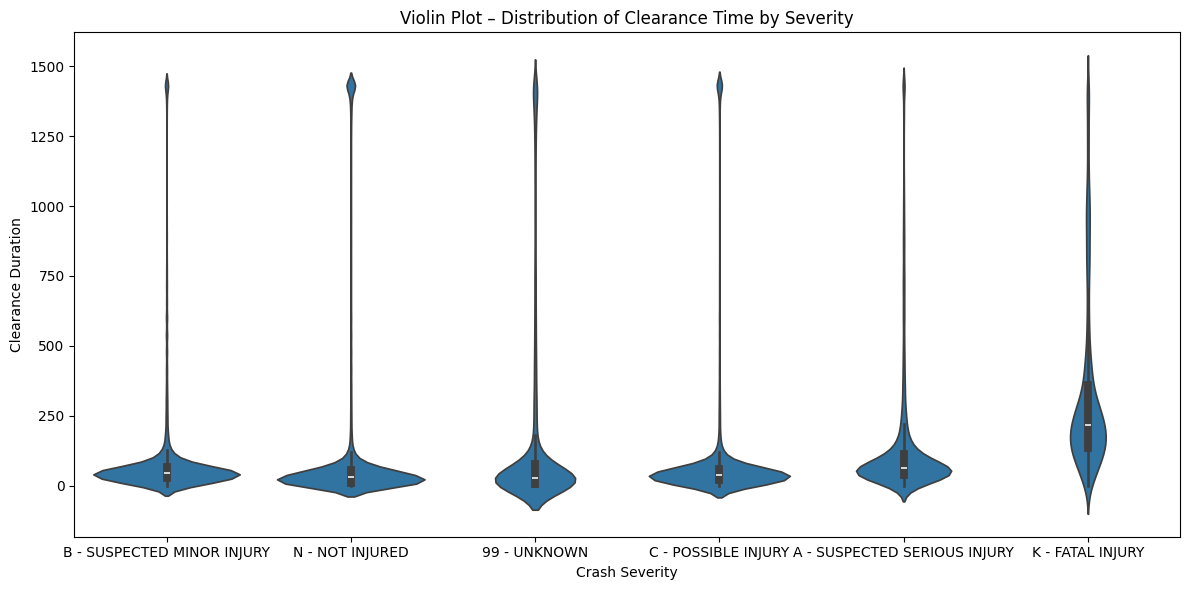

In [123]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_final, x='Crash Severity', y='Clearance Duration')
plt.title('Violin Plot – Distribution of Clearance Time by Severity')
plt.tight_layout()
plt.show()

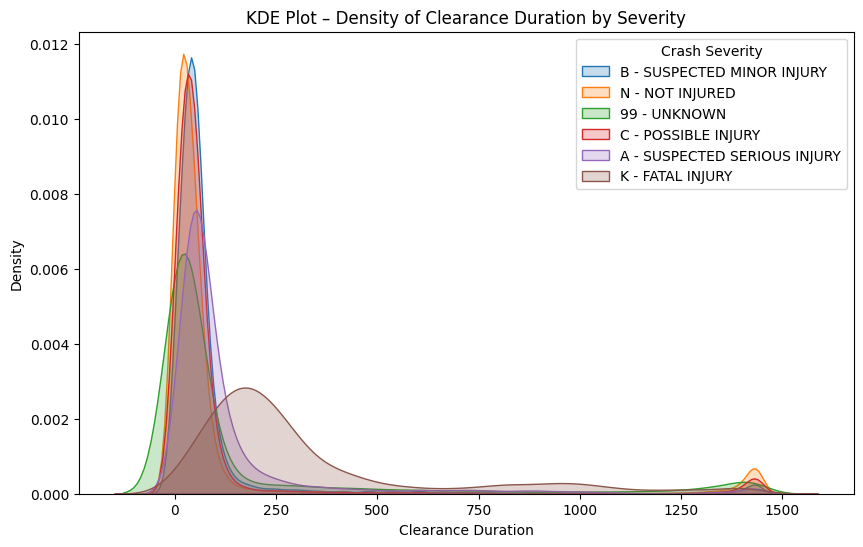

In [124]:
plt.figure(figsize=(10, 6))
for severity in df_final['Crash Severity'].unique():
    sns.kdeplot(df_final.loc[df_final['Crash Severity'] == severity, 'Clearance Duration'], label=severity, fill=True)
plt.title('KDE Plot – Density of Clearance Duration by Severity')
plt.legend(title='Crash Severity')
plt.show()

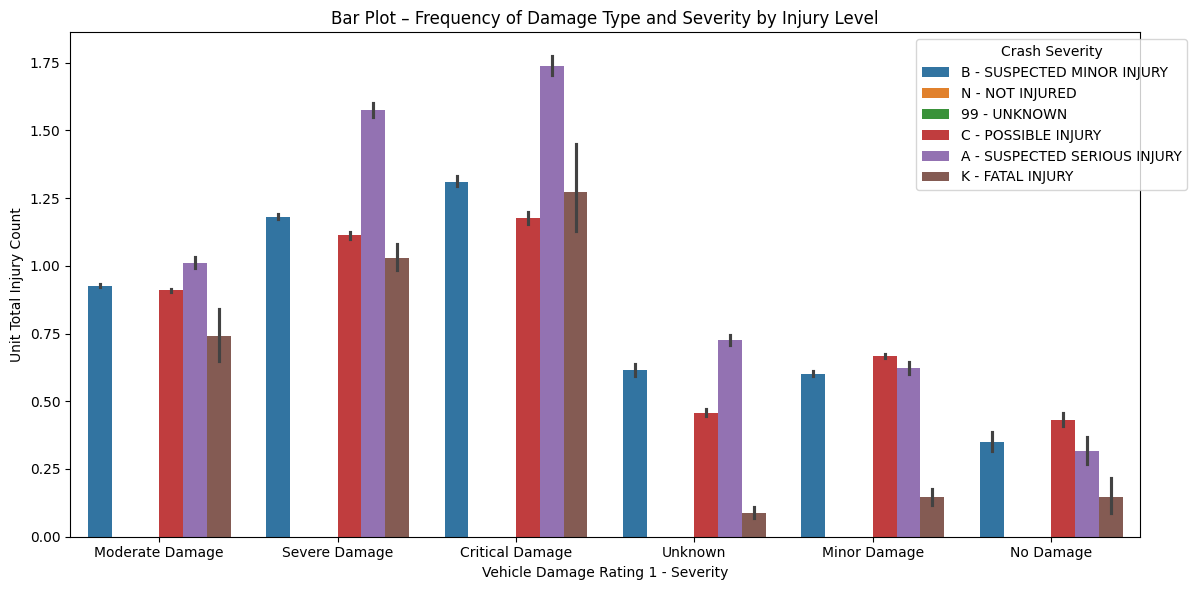

In [125]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_final, x='Vehicle Damage Rating 1 - Severity', y='Unit Total Injury Count', hue='Crash Severity')
plt.title('Bar Plot – Frequency of Damage Type and Severity by Injury Level')
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

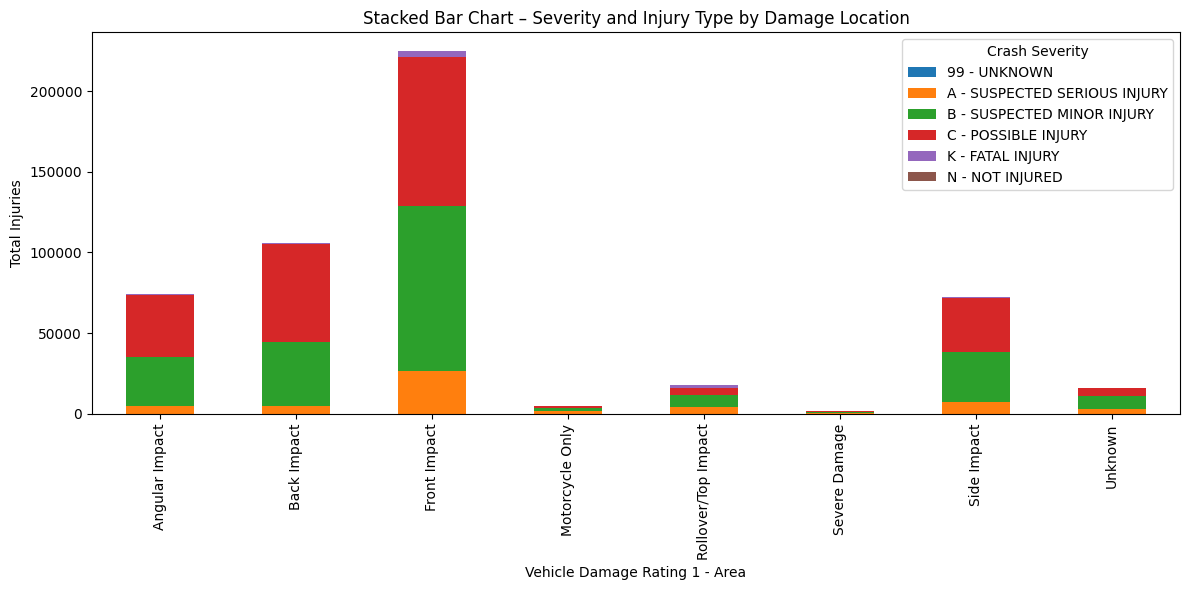

In [126]:
pivot = df_final.pivot_table(index='Vehicle Damage Rating 1 - Area', 
                             columns='Crash Severity', 
                             values='Unit Total Injury Count', 
                             aggfunc='sum').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart – Severity and Injury Type by Damage Location')
plt.ylabel('Total Injuries')
plt.legend(title='Crash Severity')
plt.tight_layout()
plt.show()

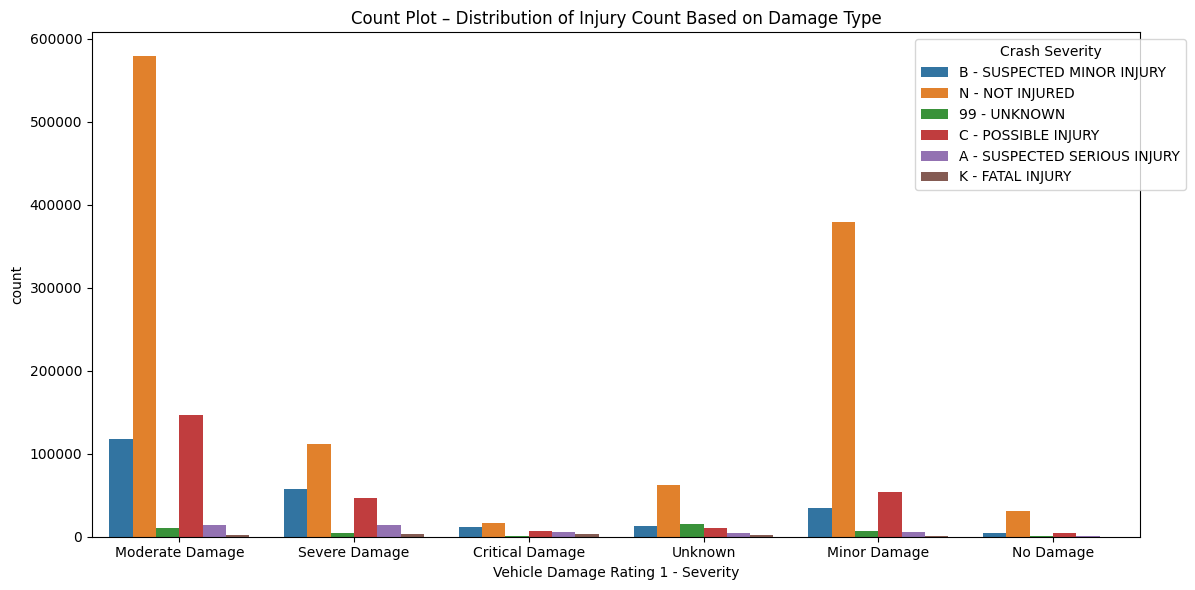

In [127]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='Vehicle Damage Rating 1 - Severity', hue='Crash Severity')
plt.title('Count Plot – Distribution of Injury Count Based on Damage Type')
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

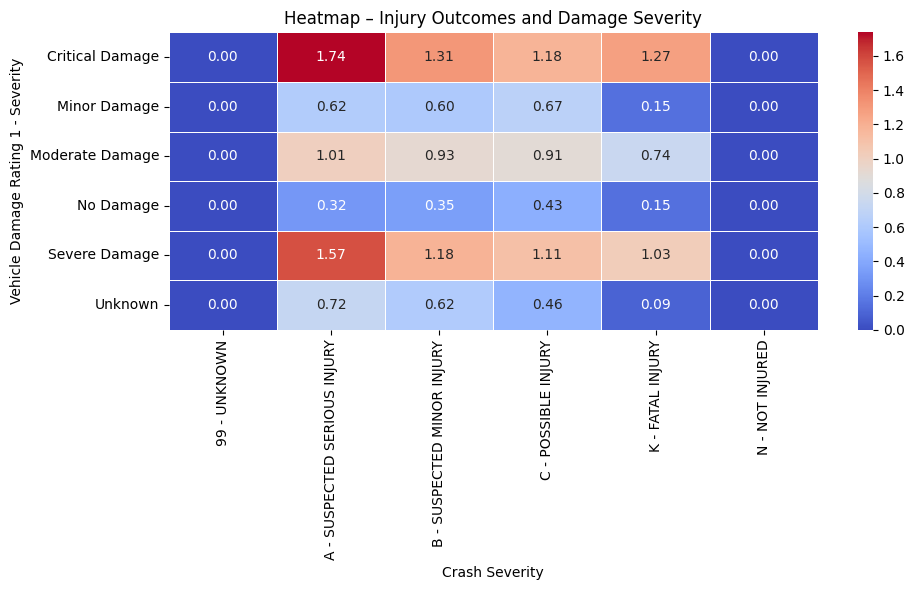

In [128]:
pivot = df_final.pivot_table(index='Vehicle Damage Rating 1 - Severity', 
                             columns='Crash Severity', 
                             values='Unit Total Injury Count', 
                             aggfunc='mean').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap – Injury Outcomes and Damage Severity')
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

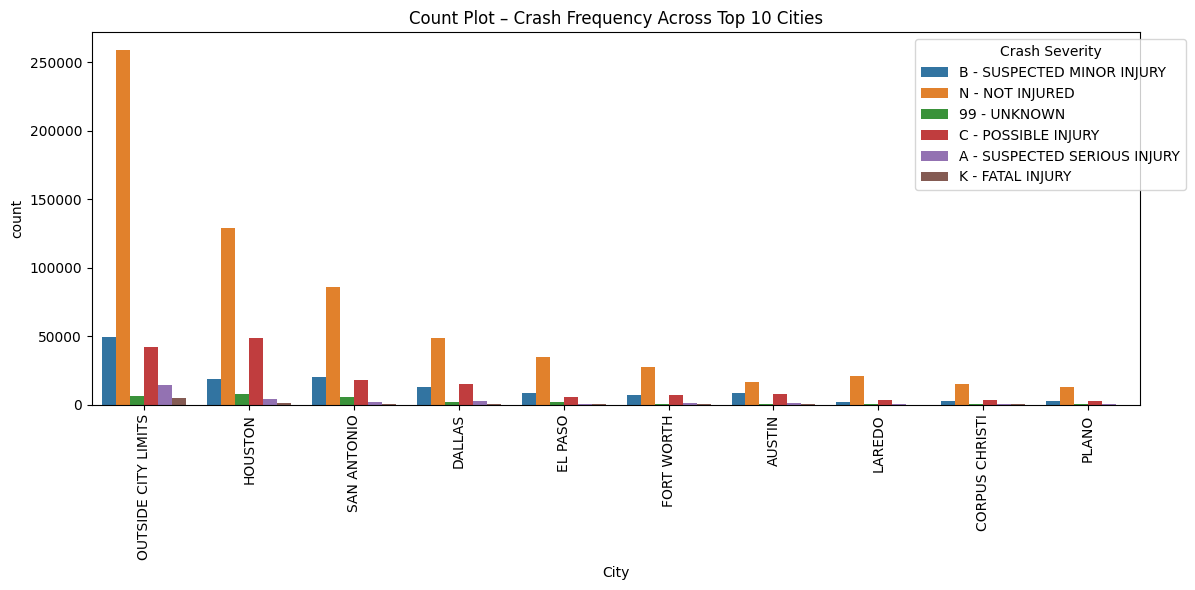

In [129]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='City', order=df_final['City'].value_counts().index[:10], hue='Crash Severity')
plt.title('Count Plot – Crash Frequency Across Top 10 Cities')
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

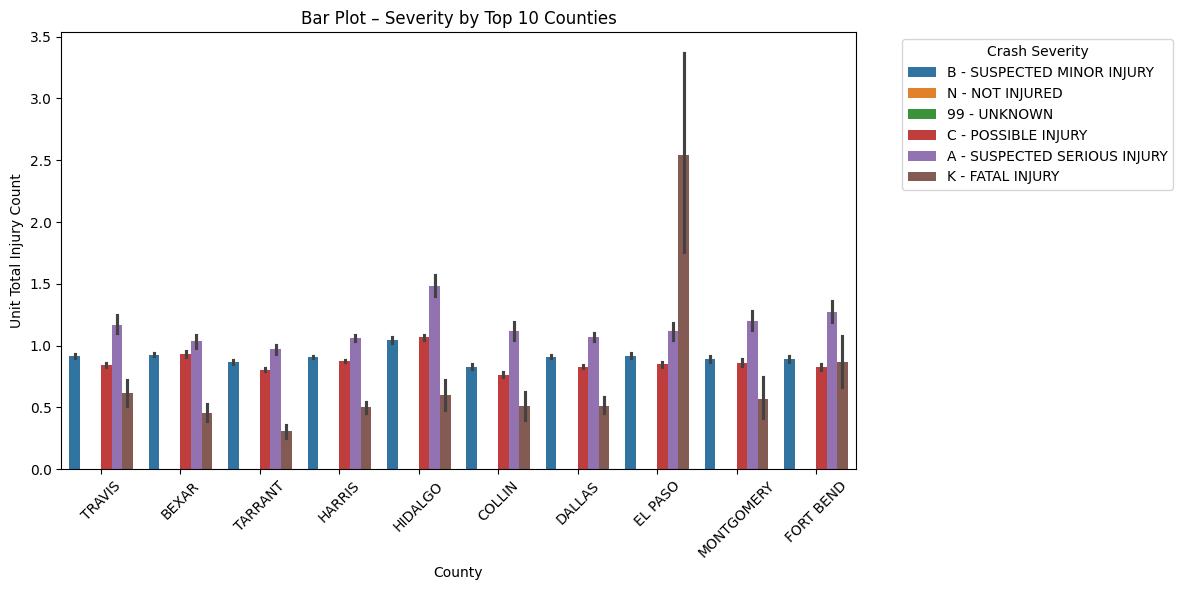

In [130]:
top_10_counties = df_final['County'].value_counts().index[:10]
filtered_data = df_final[df_final['County'].isin(top_10_counties)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='County', y='Unit Total Injury Count', hue='Crash Severity')
plt.title('Bar Plot – Severity by Top 10 Counties')
plt.xticks(rotation=45)
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [131]:
!pip install --upgrade geopandas contextily

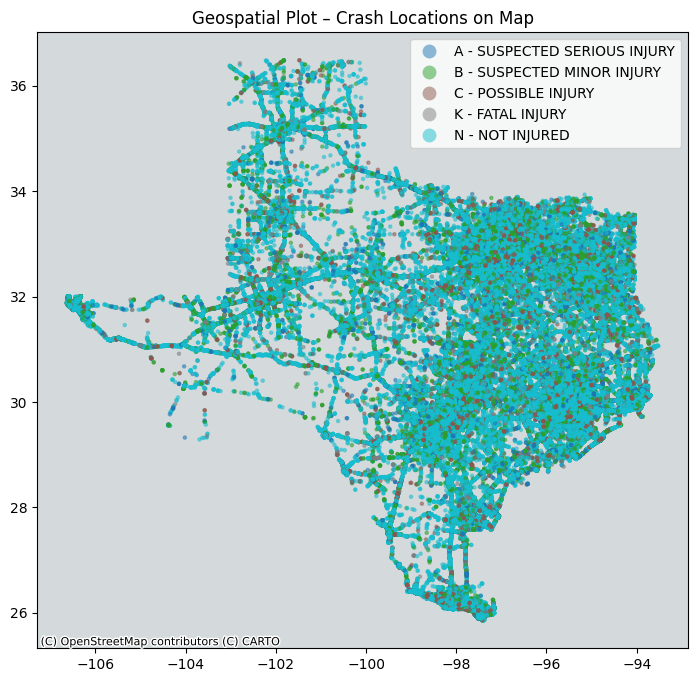

In [132]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

filtered_df = df_final[df_final['Crash Severity'] != '99 - UNKNOWN']

gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df['Longitude'], filtered_df['Latitude']))
gdf = gdf.set_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, markersize=5, alpha=0.5, column='Crash Severity', legend=True)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=12)

plt.title('Geospatial Plot – Crash Locations on Map')
plt.show()

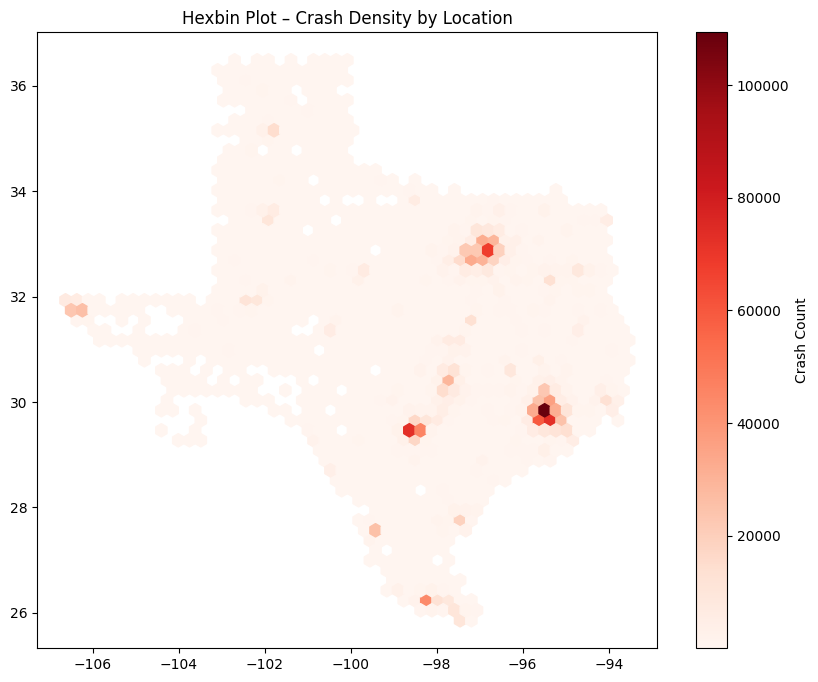

In [133]:
plt.figure(figsize=(10, 8))
hb = plt.hexbin(df_final['Longitude'], df_final['Latitude'], gridsize=50, cmap='Reds', mincnt=1)
plt.colorbar(hb, label='Crash Count')
plt.title('Hexbin Plot – Crash Density by Location')
plt.show()

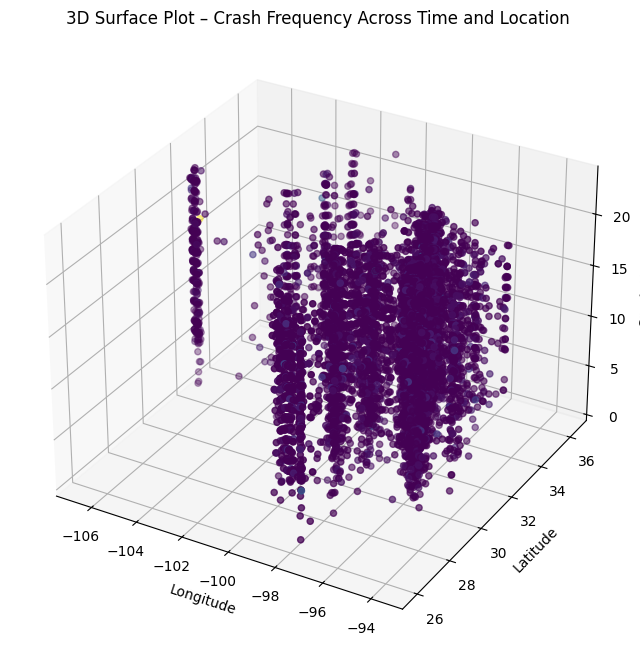

In [134]:
from mpl_toolkits.mplot3d import Axes3D

# Sample 10000 points for better performance
sampled_data = df_final.sample(10000)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot latitude, longitude, and crash hour
ax.scatter(sampled_data['Longitude'], sampled_data['Latitude'], sampled_data['Crash Hour'], 
           c=sampled_data['Unit Total Injury Count'], cmap='viridis')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Crash Hour')
plt.title('3D Surface Plot – Crash Frequency Across Time and Location')
plt.show()

In [135]:
!pip install folium

##### Data Transformation

In [136]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778336 entries, 0 to 1831090
Data columns (total 62 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   Crash ID                                      int64         
 1   City                                          object        
 2   Crash Date                                    object        
 3   Crash Time                                    datetime64[ns]
 4   Crash Severity                                object        
 5   Day of Week                                   object        
 6   Fatal Crash Flag                              int64         
 7   Crash Month                                   int64         
 8   Latitude                                      float64       
 9   Longitude                                     float64       
 10  Road Class                                    object        
 11  Time Roadway Cleared         

In [137]:
df_final.isnull().sum()

Crash ID           0
City               0
Crash Date         0
Crash Time         0
Crash Severity     0
                  ..
Youth Driver       0
Elderly Driver     0
Repeat Offender    0
BAC Level          0
Vehicle Age        0
Length: 62, dtype: int64

In [138]:
datetime_columns = ['Crash Date', 'Crash Time', 'Time Roadway Cleared', 'Time Arrived', 'Time Notified']
df_final.drop(datetime_columns, axis=1, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778336 entries, 0 to 1831090
Data columns (total 57 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Crash ID                                      int64  
 1   City                                          object 
 2   Crash Severity                                object 
 3   Day of Week                                   object 
 4   Fatal Crash Flag                              int64  
 5   Crash Month                                   int64  
 6   Latitude                                      float64
 7   Longitude                                     float64
 8   Road Class                                    object 
 9   Weather Condition                             object 
 10  Driver Alcohol Result                         object 
 11  Driver Drug Test Result                       object 
 12  Driver License Class                          object 
 13  Dr

In [139]:
df_final.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778336 entries, 0 to 1831090
Data columns (total 35 columns):
 #   Column                                        Dtype 
---  ------                                        ----- 
 0   City                                          object
 1   Crash Severity                                object
 2   Day of Week                                   object
 3   Road Class                                    object
 4   Weather Condition                             object
 5   Driver Alcohol Result                         object
 6   Driver Drug Test Result                       object
 7   Driver License Class                          object
 8   Driver License State                          object
 9   Driver License Type                           object
 10  Vehicle Damage Rating 1 - Area                object
 11  Vehicle Damage Rating 1 - Direction of Force  object
 12  Vehicle Damage Rating 1 - Severity            object
 13  Vehicle Hit and R

In [140]:
df_final['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 1178212
C - POSSIBLE INJURY              268761
B - SUSPECTED MINOR INJURY       237890
A - SUSPECTED SERIOUS INJURY      43932
99 - UNKNOWN                      39052
K - FATAL INJURY                  10489
Name: count, dtype: int64

In [141]:
df_final['Crash Severity'] = df_final['Crash Severity'].map({
    'N - NOT INJURED': 0,
    'C - POSSIBLE INJURY': 1,
    'B - SUSPECTED MINOR INJURY': 2,
    'A - SUSPECTED SERIOUS INJURY': 3,
    '99 - UNKNOWN': 0,
    'K - FATAL INJURY': 4
})

print(df_final['Crash Severity'].value_counts())

Crash Severity
0    1217264
1     268761
2     237890
3      43932
4      10489
Name: count, dtype: int64


In [142]:
df_final['Day of Week'].value_counts()

Day of Week
FRIDAY       300031
THURSDAY     267846
WEDNESDAY    262278
TUESDAY      259793
MONDAY       247260
SATURDAY     243572
SUNDAY       197556
Name: count, dtype: int64

In [143]:
# Exported to CSV - Additional Insights
#df_final.to_csv('df_final.csv', index=False)

In [144]:
df_final.drop(['Intersecting Street Number'], axis=1, inplace=True)

In [145]:
df_final.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778336 entries, 0 to 1831090
Data columns (total 33 columns):
 #   Column                                        Dtype 
---  ------                                        ----- 
 0   City                                          object
 1   Day of Week                                   object
 2   Road Class                                    object
 3   Weather Condition                             object
 4   Driver Alcohol Result                         object
 5   Driver Drug Test Result                       object
 6   Driver License Class                          object
 7   Driver License State                          object
 8   Driver License Type                           object
 9   Vehicle Damage Rating 1 - Area                object
 10  Vehicle Damage Rating 1 - Direction of Force  object
 11  Vehicle Damage Rating 1 - Severity            object
 12  Vehicle Hit and Run Flag                      object
 13  Vehicle Model Nam

In [146]:
df_final['Day of Week'] = df_final['Day of Week'].map({
    'MONDAY': 0,
    'TUESDAY': 1,
    'WEDNESDAY': 2,
    'THURSDAY': 3,
    'FRIDAY': 4,
    'SATURDAY': 5,
    'SUNDAY': 6
})

# Apply cyclical encoding
df_final['Day of Week Sin'] = np.sin(2 * np.pi * df_final['Day of Week'] / 7)
df_final['Day of Week Cos'] = np.cos(2 * np.pi * df_final['Day of Week'] / 7)

# Drop the original day of the week column (optional)
df_final.drop('Day of Week', axis=1, inplace=True)

In [147]:
print(df_final['Day of Week Sin'].unique())
print(df_final['Day of Week Cos'].unique())

[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]


In [148]:
df_final['Month Sin'] = np.sin(2 * np.pi * df_final['Crash Month'] / 12)
df_final['Month Cos'] = np.cos(2 * np.pi * df_final['Crash Month'] / 12)

df_final.drop('Crash Month', axis=1, inplace=True)

print(df_final[['Month Sin', 'Month Cos']].head())

   Month Sin  Month Cos
0        0.5   0.866025
1        0.5   0.866025
2        0.5   0.866025
3        0.5   0.866025
4        0.5   0.866025


In [149]:
print(df_final['Month Sin'].unique())
print(df_final['Month Cos'].unique())

[ 5.00000000e-01  8.66025404e-01  1.00000000e+00  8.66025404e-01
  1.22464680e-16 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00
 -8.66025404e-01 -5.00000000e-01 -2.44929360e-16]
[ 8.66025404e-01  5.00000000e-01  6.12323400e-17 -5.00000000e-01
 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01 -5.00000000e-01
 -1.83697020e-16  8.66025404e-01  1.00000000e+00]


In [150]:
cols = pd.get_dummies(df_final['Road Class'], prefix='Road Class')
df_final[cols.columns] = cols

# Drop the original column
df_final.drop('Road Class', axis=1, inplace=True)

In [151]:
cols = pd.get_dummies(df_final['Weather Condition'], prefix='Weather Condition')
df_final[cols.columns] = cols

# Drop the original column
df_final.drop('Weather Condition', axis=1, inplace=True)

In [152]:
df_final['Driver Alcohol Result'].value_counts() 

Driver Alcohol Result
97 - NOT APPLICABLE    1761902
1 - POSITIVE             12943
2 - NEGATIVE              3491
Name: count, dtype: int64

In [153]:
# Map all values to a binary format
df_final['Driver Alcohol Result'] = df_final['Driver Alcohol Result'].map({
    '1 - POSITIVE': 1,
    '2 - NEGATIVE': 0,
    '97 - NOT APPLICABLE': 0
})

# Check the results
print(df_final['Driver Alcohol Result'].value_counts())

Driver Alcohol Result
0    1765393
1      12943
Name: count, dtype: int64


In [154]:
df_final['Driver Drug Test Result'].value_counts() 

Driver Drug Test Result
97 - NOT APPLICABLE    1775960
2 - NEGATIVE              1280
1 - POSITIVE              1096
Name: count, dtype: int64

In [155]:
# Map all values to a binary format
df_final['Driver Drug Test Result'] = df_final['Driver Drug Test Result'].map({
    '1 - POSITIVE': 1,
    '2 - NEGATIVE': 0,
    '97 - NOT APPLICABLE': 0
})

# Check the results
print(df_final['Driver Drug Test Result'].value_counts())

Driver Drug Test Result
0    1777240
1       1096
Name: count, dtype: int64


In [156]:
df_final['Driver License Class'].value_counts()

Driver License Class
C - CLASS C                1177861
5 - UNLICENSED              215017
99 - UNKNOWN                143972
98 - OTHER/OUT OF STATE     112456
A - CLASS A                  56965
CM - CLASS C AND M           33853
B - CLASS B                  26449
AM - CLASS A AND M            7895
BM - CLASS B AND M            3653
M - CLASS M                    215
Name: count, dtype: int64

In [157]:
# Apply the mapping
df_final['Driver License Class'] = df_final['Driver License Class'].map({
    'C - CLASS C': 1,
    'B - CLASS B': 2,
    'A - CLASS A': 3,
    'M - CLASS M': 4,
    'CM - CLASS C AND M': 5,
    'AM - CLASS A AND M': 6,
    'BM - CLASS B AND M': 7,
    '5 - UNLICENSED': 0,
    '99 - UNKNOWN': 0,
    '98 - OTHER/OUT OF STATE': 0
})

# Check the results
print(df_final['Driver License Class'].value_counts())

Driver License Class
1    1177861
0     471445
3      56965
5      33853
2      26449
6       7895
7       3653
4        215
Name: count, dtype: int64


In [158]:
df_final['Driver License State'].value_counts()

Driver License State
TX - TEXAS                       1375760
UN - UNKNOWN                      289805
MX - MEXICO                        14582
LA - LOUISIANA                      9057
FL - FLORIDA                        8678
                                  ...   
GU - GUAM                             31
VI - U.S. VIRGIN ISLANDS              30
SO - SONORA                           17
MP - NORTHERN MARIANA ISLANDS          4
WK - WAKE ISLAND                       2
Name: count, Length: 62, dtype: int64

In [159]:
top_states = df_final['Driver License State'].value_counts().index[:10]  # Keep top 10 states
df_final['Driver License State'] = df_final['Driver License State'].apply(
    lambda x: x if x in top_states else 'OTHER'
)

df_final = pd.get_dummies(df_final, columns=['Driver License State'], prefix='License State', drop_first=False)

In [160]:
df_final['Driver License Type'].value_counts()

Driver License Type
1 - DRIVER LICENSE            1347036
5 - UNLICENSED                 146429
99 - UNKNOWN                   143376
2 - COMMERCIAL DRIVER LIC.      69107
4 - ID CARD                     67750
98 - OTHER                       4286
3 - OCCUPATIONAL                  352
Name: count, dtype: int64

In [161]:
# Apply the mapping
df_final['Driver License Type'] = df_final['Driver License Type'].map({
    '1 - DRIVER LICENSE': 1,
    '2 - COMMERCIAL DRIVER LIC.': 2,
    '3 - OCCUPATIONAL': 3,
    '5 - UNLICENSED': 0,
    '99 - UNKNOWN': 0,
    '4 - ID CARD': 0,
    '98 - OTHER': 0
})

# Check the results
print(df_final['Driver License Type'].value_counts())

Driver License Type
1    1347036
0     361841
2      69107
3        352
Name: count, dtype: int64


In [162]:
df_final['Vehicle Damage Rating 1 - Area'].value_counts()

Vehicle Damage Rating 1 - Area
Front Impact           744601
Back Impact            342676
Angular Impact         317203
Side Impact            235624
Unknown                107656
Rollover/Top Impact     19527
Severe Damage            5806
Motorcycle Only          5243
Name: count, dtype: int64

In [163]:
# One-hot encode 'Vehicle Damage Rating 1 - Area' with prefix
df_final = pd.get_dummies(df_final, columns=['Vehicle Damage Rating 1 - Area'], prefix='Vehicle Damage Area', drop_first=False)

In [164]:
df_final['Vehicle Damage Rating 1 - Direction of Force'].value_counts()

Vehicle Damage Rating 1 - Direction of Force
12 - 12 O'CLOCK    409205
No Data            324272
6 - 6 O'CLOCK      231726
11 - 11 O'CLOCK    140412
1 - 1 O'CLOCK      135283
3 - 3 O'CLOCK      110120
9 - 9 O'CLOCK      102672
2 - 2 O'CLOCK       70957
10 - 10 O'CLOCK     67239
7 - 7 O'CLOCK       59094
5 - 5 O'CLOCK       50664
8 - 8 O'CLOCK       41035
4 - 4 O'CLOCK       35657
Name: count, dtype: int64

In [165]:
# Define mapping for clock positions
direction_mapping = {
    '12 - 12 O\'CLOCK': 0,
    '1 - 1 O\'CLOCK': 1,
    '2 - 2 O\'CLOCK': 2,
    '3 - 3 O\'CLOCK': 3,
    '4 - 4 O\'CLOCK': 4,
    '5 - 5 O\'CLOCK': 5,
    '6 - 6 O\'CLOCK': 6,
    '7 - 7 O\'CLOCK': 7,
    '8 - 8 O\'CLOCK': 8,
    '9 - 9 O\'CLOCK': 9,
    '10 - 10 O\'CLOCK': 10,
    '11 - 11 O\'CLOCK': 11,
    'No Data': -1
}

# Apply the mapping
df_final['Vehicle Damage Rating 1 - Direction of Force'] = df_final['Vehicle Damage Rating 1 - Direction of Force'].map(direction_mapping)

# Replace -1 with the mode value
mode_value = df_final['Vehicle Damage Rating 1 - Direction of Force'].mode()[0]
df_final['Vehicle Damage Rating 1 - Direction of Force'] = df_final['Vehicle Damage Rating 1 - Direction of Force'].replace(-1, mode_value)

# Cyclical encoding
df_final['Vehicle Direction of Force Sin'] = np.sin(2 * np.pi * df_final['Vehicle Damage Rating 1 - Direction of Force'] / 12)
df_final['Vehicle Direction of Force Cos'] = np.cos(2 * np.pi * df_final['Vehicle Damage Rating 1 - Direction of Force'] / 12)

# Drop the original column after encoding
df_final.drop('Vehicle Damage Rating 1 - Direction of Force', axis=1, inplace=True)

In [166]:
df_final['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
Moderate Damage    869310
Minor Damage       479687
Severe Damage      235925
Unknown            107656
Critical Damage     44390
No Damage           41368
Name: count, dtype: int64

In [167]:
# Apply the mapping
df_final['Vehicle Damage Rating 1 - Severity'] = df_final['Vehicle Damage Rating 1 - Severity'].map({
    'No Damage': 0,
    'Minor Damage': 1,
    'Moderate Damage': 2,
    'Severe Damage': 3,
    'Critical Damage': 3,
    'Unknown': 0
})

# Check the results
print(df_final['Vehicle Damage Rating 1 - Severity'].value_counts())

Vehicle Damage Rating 1 - Severity
2    869310
1    479687
3    280315
0    149024
Name: count, dtype: int64


In [168]:
df_final['Vehicle Hit and Run Flag'].value_counts()

Vehicle Hit and Run Flag
No     1654904
Yes     123432
Name: count, dtype: int64

In [169]:
df_final['Vehicle Hit and Run Flag'] = df_final['Vehicle Hit and Run Flag'].map({
    'Yes': 1,
    'No': 0
})

# Check the results
print(df_final['Vehicle Hit and Run Flag'].value_counts())

Vehicle Hit and Run Flag
0    1654904
1     123432
Name: count, dtype: int64


In [170]:
df_final['Vehicle Model Name'].value_counts()

Vehicle Model Name
F150 (FORD)                           68199
No Data                               56853
SILVERADO (CHEVROLET)                 50855
CAMRY (TOYOTA)                        47633
COROLLA (TOYOTA)                      38831
                                      ...  
FLTRSE3 (HARLEY-DAVIDSON)                 1
UNKNOWN (CHAPARRAL TRAILERS OF AR)        1
SRX250 (YAMAHA)                           1
NESS MAGNUM (VICTORY MOTORCYCLES)         1
XT600 (YAMAHA)                            1
Name: count, Length: 3404, dtype: int64

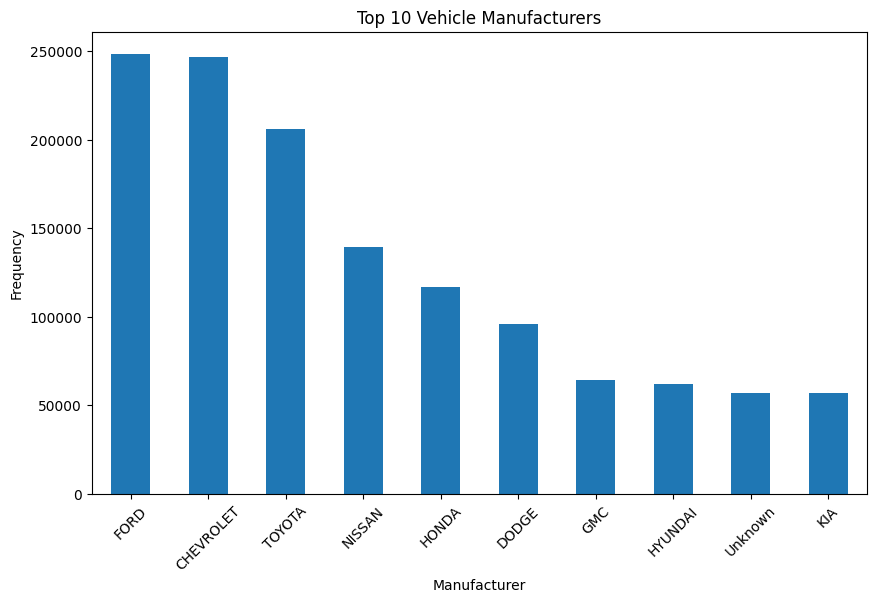

In [171]:
# Create columns if they do not exist
df_final['Vehicle Manufacturer'] = df_final.get('Vehicle Manufacturer', pd.NA)
df_final['Vehicle Model'] = df_final.get('Vehicle Model', pd.NA)

# Extract manufacturer ONLY if the value is not already 'UNKNOWN' or 'Unknown'
mask_manufacturer = ~df_final['Vehicle Manufacturer'].isin(['UNKNOWN', 'Unknown'])
df_final.loc[mask_manufacturer, 'Vehicle Manufacturer'] = \
    df_final.loc[mask_manufacturer, 'Vehicle Model Name'].str.extract(r'\((.*?)\)', expand=False)

# Fill missing values
df_final.loc[df_final['Vehicle Manufacturer'].isna(), 'Vehicle Manufacturer'] = 'Unknown'

# Extract vehicle model ONLY if the value is not already 'UNKNOWN' or 'Unknown'
mask_model = ~df_final['Vehicle Model'].isin(['UNKNOWN', 'Unknown'])
df_final.loc[mask_model, 'Vehicle Model'] = \
    df_final.loc[mask_model, 'Vehicle Model Name'].str.extract(r'^(.*?)\s?\(', expand=False)

# Fill missing values
df_final.loc[df_final['Vehicle Model'].isna(), 'Vehicle Model'] = 'Unknown'

# Top 10 manufacturers
top_10_manufacturers = df_final['Vehicle Manufacturer'].value_counts().head(10)

# Plotting top 10 manufacturers
plt.figure(figsize=(10, 6))
top_10_manufacturers.plot(kind='bar')
plt.title('Top 10 Vehicle Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

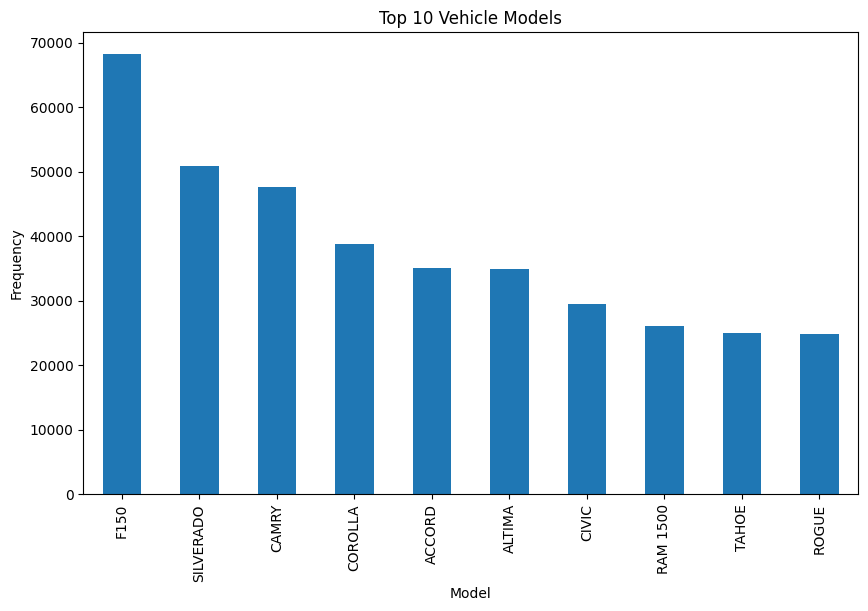

In [172]:
# Exclude 'UNKNOWN' and 'Unknown' from the top models
top_10_models_filtered = df_final.loc[~df_final['Vehicle Model'].isin(['UNKNOWN', 'Unknown']), 'Vehicle Model'] \
                                 .value_counts().head(10)

# Plotting the filtered top 10 models
plt.figure(figsize=(10, 6))
top_10_models_filtered.plot(kind='bar')
plt.title('Top 10 Vehicle Models')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [173]:
df_final.drop(['Vehicle Manufacturer','Vehicle Model Name', 'Vehicle Model'], axis=1, inplace=True)

In [174]:
df_final['Person Airbag Deployed'].value_counts()

Person Airbag Deployed
Not Deployed              1293168
5 - DEPLOYED, MULTIPLE     168578
99 - UNKNOWN               167180
2 - DEPLOYED, FRONT        111047
3 - DEPLOYED, SIDE          37666
4 - DEPLOYED, REAR            697
Name: count, dtype: int64

In [175]:
# Replace 'Unknown' with 'Not Deployed'
df_final['Person Airbag Deployed'] = df_final['Person Airbag Deployed'].replace('99 - UNKNOWN', 'Not Deployed')
df_final['Person Airbag Deployed'] = df_final['Person Airbag Deployed'].map({
    'Not Deployed': 0,
    '2 - DEPLOYED, FRONT': 1,
    '3 - DEPLOYED, SIDE': 2,
    '4 - DEPLOYED, REAR': 3,
    '5 - DEPLOYED, MULTIPLE': 4
})

# Check the results
print(df_final['Person Airbag Deployed'].value_counts())

Person Airbag Deployed
0    1460348
4     168578
1     111047
2      37666
3        697
Name: count, dtype: int64


In [176]:
df_final['Person Gender'].value_counts()

Person Gender
1 - MALE        938365
2 - FEMALE      744360
99 - UNKNOWN     95611
Name: count, dtype: int64

In [177]:
df_final['Person Gender'] = df_final['Person Gender'].map({
    '1 - MALE': 0,
    '2 - FEMALE': 1,
    '99 - UNKNOWN': 0
})

# Check the results
print(df_final['Person Gender'].value_counts())

Person Gender
0    1033976
1     744360
Name: count, dtype: int64


In [178]:
df_final['Roadway Type'].value_counts()

Roadway Type
OTHER ROAD TYPE               859302
4 OR MORE LANES, DIVIDED      574997
4 OR MORE LANES, UNDIVIDED    205426
2 LANE, 2 WAY                 138611
Name: count, dtype: int64

In [179]:
# One-hot encode 'Roadway Type' column
df_final = pd.get_dummies(df_final, columns=['Roadway Type'], prefix='Roadway Type', drop_first=False)

In [180]:
df_final['Person Blood Alcohol Content Test Result'].value_counts()

Person Blood Alcohol Content Test Result
No Data    1764388
0             2184
0.15           184
0.17           180
0.14           156
            ...   
0.362            1
0.88             1
0.53             1
0.381            1
0.382            1
Name: count, Length: 423, dtype: int64

In [181]:
df_final.drop(['Person Blood Alcohol Content Test Result'], axis=1, inplace=True)

In [182]:
df_final['Construction Zone Flag'].value_counts()

Construction Zone Flag
No     1691921
Yes      86415
Name: count, dtype: int64

In [183]:
df_final['Construction Zone Flag'] = df_final['Construction Zone Flag'].map({
    'Yes': 1,
    'No': 0
})

# Check the results
print(df_final['Construction Zone Flag'].value_counts())

Construction Zone Flag
0    1691921
1      86415
Name: count, dtype: int64


In [184]:
df_final['Contributing Factors'].value_counts()

Contributing Factors
OTHER                                               520288
FAILED TO CONTROL SPEED                             308488
CHANGED LANE WHEN UNSAFE                            124075
DRIVER INATTENTION                                  102074
FAILED TO YIELD RIGHT OF WAY - TURNING LEFT          92825
FAILED TO YIELD RIGHT OF WAY - STOP SIGN             85028
OTHER (EXPLAIN IN NARRATIVE)                         82817
FAILED TO DRIVE IN SINGLE LANE                       58554
DISREGARD STOP AND GO SIGNAL                         53138
FAILED TO YIELD RIGHT OF WAY - PRIVATE DRIVE         52500
BACKED WITHOUT SAFETY                                45966
FOLLOWED TOO CLOSELY                                 40274
DISREGARD STOP SIGN OR LIGHT                         34605
DRIVER INATTENTION; FAILED TO CONTROL SPEED          34080
UNSAFE SPEED                                         29883
NONE                                                 27081
TURNED WHEN UNSAFE                 

In [185]:
# Define the grouping
factor_mapping = {
    'FAILED TO CONTROL SPEED': 'SPEED-RELATED',
    'UNSAFE SPEED': 'SPEED-RELATED',
    'FOLLOWED TOO CLOSELY': 'SPEED-RELATED',

    'CHANGED LANE WHEN UNSAFE': 'LANE OR TURNING',
    'FAILED TO DRIVE IN SINGLE LANE': 'LANE OR TURNING',
    'TURNED WHEN UNSAFE': 'LANE OR TURNING',
    'TURNED IMPROPERLY - WRONG LANE': 'LANE OR TURNING',

    'FAILED TO YIELD RIGHT OF WAY - TURNING LEFT': 'FAIL TO YIELD',
    'FAILED TO YIELD RIGHT OF WAY - STOP SIGN': 'FAIL TO YIELD',
    'FAILED TO YIELD RIGHT OF WAY - PRIVATE DRIVE': 'FAIL TO YIELD',
    'FAILED TO YIELD RIGHT OF WAY - OPEN INTERSECTION': 'FAIL TO YIELD',

    'DISREGARD STOP AND GO SIGNAL': 'TRAFFIC SIGNAL VIOLATION',
    'DISREGARD STOP SIGN OR LIGHT': 'TRAFFIC SIGNAL VIOLATION',

    'DRIVER INATTENTION': 'DRIVER BEHAVIOR',
    'BACKED WITHOUT SAFETY': 'DRIVER BEHAVIOR',
    'FAULTY EVASIVE ACTION': 'DRIVER BEHAVIOR',

    'DRIVER INATTENTION; FAILED TO CONTROL SPEED': 'DRIVER BEHAVIOR',
    'CHANGED LANE WHEN UNSAFE; DRIVER INATTENTION': 'DRIVER BEHAVIOR',

    'OTHER': 'OTHER',
    'OTHER (EXPLAIN IN NARRATIVE)': 'OTHER',
    'NONE': 'OTHER'
}

# Apply the grouping
df_final['Contributing Factors'] = df_final['Contributing Factors'].map(factor_mapping)

# One-hot encode the grouped categories
df_final = pd.get_dummies(df_final, columns=['Contributing Factors'], prefix='Contributing Factor', drop_first=False)

In [186]:
df_final['First Harmful Event'].value_counts()

First Harmful Event
MOTOR VEHICLE IN TRANSPORT    1506506
FIXED OBJECT                   136755
PARKED CAR                      67514
Other                           32420
PEDESTRIAN                      19758
OVERTURNED                      15383
Name: count, dtype: int64

In [187]:
df_final['First Harmful Event'] = df_final['First Harmful Event'].map({
    'MOTOR VEHICLE IN TRANSPORT': 'MOTOR VEHICLE IN TRANSPORT',
    'FIXED OBJECT': 'COLLISION WITH FIXED OBJECT',
    'PARKED CAR': 'PARKED CAR OR PEDESTRIAN',
    'PEDESTRIAN': 'PARKED CAR OR PEDESTRIAN',
    'OVERTURNED': 'OVERTURNED',
    'Other': 'OTHER'
})

# One-hot encode the grouped categories
df_final = pd.get_dummies(df_final, columns=['First Harmful Event'], prefix='Event', drop_first=False)

In [188]:
df_final['Manner of Collision'].value_counts()

Manner of Collision
SAME DIRECTION        851216
ANGLE                 432578
ONE MOTOR VEHICLE     271830
OPPOSITE DIRECTION    194484
OTHER                  28228
Name: count, dtype: int64

In [189]:
# One-hot encode 'Manner of Collision'
df_final = pd.get_dummies(df_final, columns=['Manner of Collision'], prefix='Manner of Collision', drop_first=False)

In [190]:
df_final.drop(['Object Struck'], axis=1, inplace=True)

In [191]:
df_final['Roadbed Width'].value_counts()

Roadbed Width
No Data    857519
80          68654
76          67373
112         35600
72          34816
            ...  
286            11
226            10
206            10
193             5
280             2
Name: count, Length: 195, dtype: int64

In [192]:
df_final['Roadway Function'].value_counts()

Roadway Function
No Data                         857519
OTHER PRINCIPAL ARTERIAL        335472
INTERSTATE                      295046
MINOR ARTERIAL                  116114
OTHER FREEWAY AND EXPRESSWAY    112978
MAJOR COLLECTOR                  57495
MINOR COLLECTOR                   3104
LOCAL                              608
Name: count, dtype: int64

In [193]:
df_final.drop(['Roadbed Width', 'Roadway Function'], axis=1, inplace=True)

In [194]:
df_final['Roadway Relation'].value_counts()

Roadway Relation
ON ROADWAY        1520792
OFF ROADWAY        117594
NOT APPLICABLE     105991
MEDIAN              28635
SHOULDER             5324
Name: count, dtype: int64

In [195]:
# One-hot encode 'Roadway Relation'
df_final = pd.get_dummies(df_final, columns=['Roadway Relation'], prefix='RoadwayRelation', drop_first=False)

In [196]:
df_final['Rural Urban Type'].value_counts()

Rural Urban Type
Unknown                       857519
LARGE URBANIZED (200,000+)    568113
RURAL (<5000)                 148160
URBANIZED (50,000-199,999)    116359
SMALL URBAN (5000-49,999)      88185
Name: count, dtype: int64

In [197]:
# Define binary mapping for urban vs non-urban
df_final['Rural Urban Type'] = df_final['Rural Urban Type'].map(
    lambda x: 1 if x in ['SMALL URBAN (5000-49,999)', 'URBANIZED (50,000-199,999)', 'LARGE URBANIZED (200,000+)'] else 0
)

# Check the results
print(df_final['Rural Urban Type'].value_counts())

Rural Urban Type
0    1005679
1     772657
Name: count, dtype: int64


In [198]:
df_final['Time of Day'].value_counts()

Time of Day
Afternoon    639879
Morning      496261
Evening      448281
Night        193915
Name: count, dtype: int64

In [199]:
# One-hot encode 'Time of Day'
df_final = pd.get_dummies(df_final, columns=['Time of Day'], prefix='Time', drop_first=False)

In [200]:
df_final['Crash Season'].value_counts()

Crash Season
Winter    588426
Fall      409410
Spring    402825
Summer    377675
Name: count, dtype: int64

In [201]:
# One-hot encode 'Crash Season'
df_final = pd.get_dummies(df_final, columns=['Crash Season'], prefix='Season', drop_first=False)

In [202]:
df_final['Light Condition'].value_counts()

Light Condition
Daylight    1262658
Dark         268154
Twilight     247524
Name: count, dtype: int64

In [203]:
# One-hot encode 'Light Condition'
df_final = pd.get_dummies(df_final, columns=['Light Condition'], prefix='Light', drop_first=False)

In [204]:
# Drop the 'Urban or Rural' column
df_final.drop('Urban or Rural', axis=1, inplace=True)


In [205]:
df_final['BAC Level'].value_counts()

BAC Level
No Alcohol           1766572
High BAC                7104
Above Legal Limit       3817
Legal Limit              843
Name: count, dtype: int64

In [206]:
# Apply the mapping
df_final['BAC Level'] = df_final['BAC Level'].map({
    'No Alcohol': 'No Alcohol',
    'High BAC': 'Above Legal Limit',
    'Above Legal Limit': 'Above Legal Limit',
    'Legal Limit': 'Legal Limit'
})

# One-hot encode the cleaned categories
df_final = pd.get_dummies(df_final, columns=['BAC Level'], prefix='BAC', drop_first=False)

In [207]:
df_final['City'].value_counts()

City
OUTSIDE CITY LIMITS    375344
HOUSTON                209477
SAN ANTONIO            131925
DALLAS                  81287
EL PASO                 52119
                        ...  
CRYSTAL BEACH               1
BACLIFF                     1
EAST TAWAKONI               1
OZONA                       1
MORAN                       1
Name: count, Length: 1207, dtype: int64

In [208]:
# List of Texas Triangle cities (based on the map)
texas_triangle = {
    'DALLAS', 'FORT WORTH', 'ARLINGTON', 
    'SAN ANTONIO', 'NEW BRAUNFELS', 
    'HOUSTON', 'SUGAR LAND', 'BAYTOWN', 
    'AUSTIN', 'ROUND ROCK', 'SAN MARCOS', 
    'COLLEGE STATION'
}

# Get unique cities from the data
unique_cities = set(df_final['City'].unique())

# Find intersection (cities that match the Texas Triangle list)
matching_cities = texas_triangle.intersection(unique_cities)

print("Matching Texas Triangle Cities in Data:")
print(matching_cities)

Matching Texas Triangle Cities in Data:
{'COLLEGE STATION', 'ARLINGTON', 'SAN ANTONIO', 'BAYTOWN', 'SAN MARCOS', 'ROUND ROCK', 'HOUSTON', 'AUSTIN', 'SUGAR LAND', 'NEW BRAUNFELS', 'DALLAS', 'FORT WORTH'}


In [209]:
# Map Texas Triangle cities to 1, others to 0
df_final['Texas Triangle'] = df_final['City'].apply(
    lambda x: 1 if x in texas_triangle else 0
)

# Drop original 'City' column if needed
df_final.drop('City', axis=1, inplace=True)

# Check the result
print(df_final['Texas Triangle'].value_counts())

Texas Triangle
0    1223445
1     554891
Name: count, dtype: int64


In [210]:
df_final['County'].value_counts()

County
HARRIS     374606
BEXAR      161135
DALLAS     144916
TARRANT     91657
HIDALGO     64797
            ...  
KING           21
IRION          20
BRISCOE        19
KENT           17
FOARD          10
Name: count, Length: 254, dtype: int64

In [212]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778336 entries, 0 to 1831090
Columns: 110 entries, Crash ID to Texas Triangle
dtypes: bool(72), float64(12), int32(1), int64(25)
memory usage: 644.5 MB


In [213]:
# Final Dataset
#df_final.to_csv('Final_Dataset.csv', index=False)